**CSI 4106 Introduction to Artificial Intelligence** <br/>
*Assignment 3: Neural Networks*

# Identification

Name: Youssef Chouay <br/>
Student Number: 300162426

# Exploration & Analyse
## Chargement de l'ensemble de données

Un ensemble de données a été créé pour ce devoir. Il est disponible sur un dépôt GitHub public :

- [github.com/turcotte/csi4106-f24/tree/main/assignments-data/a3](https://github.com/turcotte/csi4106-f24/tree/main/assignments-data/a3)

Vous devez accéder à l'ensemble de données et le lire directement à partir de ce dépôt GitHub dans votre notebook Jupyter.

Utilisez cette cellule de code pour vos directives `import` et autres initialisations.

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. **Charger l'ensemble de données** :

- Écrivez du code pour charger les trois ensembles de données.


In [123]:
dataset_train = pd.read_csv("https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a3/cb513_test.csv")
dataset_test = pd.read_csv("https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a3/cb513_train.csv")
dataset_valid = pd.read_csv("https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a3/cb513_valid.csv")

## Prétraitement des données

### 2. **Brasser les lignes** :

- Étant donné que les exemples sont générés en faisant glisser une fenêtre sur chaque séquence de protéines, la plupart des exemples adjacents proviennent de la même protéine et partagent 20 positions. Pour atténuer l'impact potentiel négatif sur l'entraînement du modèle, la première étape consiste à brasser (*shuffle*) les **lignes** de la matrice de données.


In [124]:
dataset_train = dataset_train.sample(frac=1).reset_index(drop=True)
dataset_test = dataset_test.sample(frac=1).reset_index(drop=True)
dataset_valid = dataset_valid.sample(frac=1).reset_index(drop=True)

### 3. **Mise à l'échelle des caractéristiques numériques** :

- Étant donné que les 462 caractéristiques sont des proportions représentées par des valeurs comprises entre 0 et 1, la mise à l'échelle peut ne pas être nécessaire. Dans nos évaluations, l'utilisation de [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) a en fait dégradé les performances du modèle. Dans votre flux de traitement, comparez les effets de ne pas mettre à l'échelle les données par rapport à l'application de [MinMaxScaler](https://scikit-learn.org/1.5/modules/generated/sklearn.preprocessing.MinMaxScaler.html). Par souci de temps, une seule expérience suffira. Il est important de noter que lorsque la mise à l'échelle est appliquée, une méthode uniforme doit être utilisée pour toutes les colonnes, compte tenu de leur nature homogène.

Il n'est pas nécessaires de mettre à l'échelle les étiquettes de classe. Les étiquettes de classe sont déjà toutes entre 0 et 1.

### 4. **Séparation des cibles et des données** :

- Dans les fichiers CSV, les cibles et les données sont combinées. Pour préparer nos expériences d'apprentissage automatique, séparez les données d'entraînement $X$ et le vecteur cible $y$ pour chacun des trois ensembles de données.

In [125]:
X_train = dataset_train.iloc[:, 1:]
Y_train = dataset_train.iloc[:, 0]

X_test = dataset_test.iloc[:, 1:]
Y_test = dataset_test.iloc[:, 0]

X_valid = dataset_valid.iloc[:, 1:]
Y_valid = dataset_valid.iloc[:, 0]

## Développement et évaluation des modèles

### 5. **Développement de modèle** :

- **Modèle de base** : Implémentez un modèle utilisant le [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html). Ce modèle ignore les données d'entrée et prédit la classe majoritaire. Un tel modèle est parfois appelé modèle « homme de paille ».

- **Modèle de référence** : Comme modèle de référence, sélectionnez un des algorithmes d'apprentissage automatique précédemment étudiés : arbres de décision, k-plus proches voisins (KNN) ou régression logistique. Utilisez les paramètres par défaut fournis par scikit-learn pour entraîner chaque modèle en tant que modèle de référence. Pourquoi avez-vous choisi ce classificateur particulier ? Pourquoi pensez-vous qu'il soit approprié pour cette tâche spécifique ?

- **Modèle de réseau de neurones** : En utilisant [Keras](https://keras.io) et [TensorFlow](https://www.tensorflow.org), construisez un modèle séquentiel comprenant une couche d'entrée, une couche cachée et une couche de sortie. La couche d'entrée doit comporter 462 nœuds, correspondant aux 462 attributs de chaque exemple. La couche cachée doit comprendre 8 nœuds et utiliser la fonction d'activation par défaut. La couche de sortie doit comporter trois nœuds, correspondant aux trois classes : hélice (0), feuillet (1) et enroulement (2). Appliquez la fonction d'activation softmax à la couche de sortie pour que les sorties soient traitées comme des probabilités, avec leur somme égale à 1 pour chaque exemple d'entraînement.

Nous avons donc trois modèles : de base, de référence et réseau de neurones.

In [ ]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, Y_train)

DummyClassifier(strategy='most_frequent')

In [ ]:
from sklearn.linear_model import LogisticRegression
regression_model = LogisticRegression(max_iter=1000)
regression_model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [204]:
import tensorflow as tf
import keras
from keras import layers

model = keras.Sequential()
model.add(layers.Input(shape=(X_train.shape[1],)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_valid, Y_valid), verbose=0)

### 6. **Évaluation des modèles** :

- Utilisez la validation croisée pour évaluer les performances du modèle de référence. Sélectionnez un petit nombre de plis (*plis*) pour éviter des temps de calcul excessives.

- **L'entraînement des réseaux de neurones peut être long.** Par conséquent, leurs performances sont généralement évaluées une seule fois en utilisant un ensemble de validation. Assurez-vous de ne pas utiliser l'ensemble de test avant la fin du devoir.

- Évaluez les modèles en utilisant des métriques telles que la précision, le rappel et le score F1.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict

def plot_confusion_matrix(y_true, y_pred, title="Matrice de Confusion"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Prédit")
    plt.ylabel("Réalité")
    plt.title(title)
    plt.show()


dummy_scores = cross_val_score(dummy_clf, X_valid, Y_valid, cv=8, scoring="accuracy")
dummy_predictions = cross_val_predict(dummy_clf, X_valid, Y_valid, cv=8)
dummy_accuracy = accuracy_score(Y_valid, dummy_predictions)
dummy_precision = precision_score(Y_valid, dummy_predictions, average='weighted', zero_division=0)
dummy_recall = recall_score(Y_valid, dummy_predictions, average='weighted', zero_division=0)
dummy_f1 = f1_score(Y_valid, dummy_predictions, average='weighted', zero_division=0)

regression_scores = cross_val_score(regression_model, X_valid, Y_valid, cv=8, scoring="accuracy")
regression_predictions = cross_val_predict(regression_model, X_valid, Y_valid, cv=8)
regression_accuracy = accuracy_score(Y_valid, regression_predictions)
regression_precision = precision_score(Y_valid, regression_predictions, average='weighted', zero_division=0)
regression_recall = recall_score(Y_valid, regression_predictions, average='weighted', zero_division=0)
regression_f1 = f1_score(Y_valid, regression_predictions, average='weighted', zero_division=0)

nn_clf = KerasClassifier(model=model, epochs=10, batch_size=32, verbose=0)
nn_scores = cross_val_score(nn_clf, X_valid, Y_valid, cv=8, scoring="accuracy")
nn_predictions = cross_val_predict(nn_clf, X_valid, Y_valid, cv=8)
nn_accuracy = accuracy_score(Y_valid, nn_predictions)
nn_precision = precision_score(Y_valid, nn_predictions, average='weighted', zero_division=0)
nn_recall = recall_score(Y_valid, nn_predictions, average='weighted', zero_division=0)
nn_f1 = f1_score(Y_valid, nn_predictions, average='weighted', zero_division=0)


Dummy Classifier
Accuracy:  0.41981641468682507
Precision:  0.17624582204050027
Recall:  0.41981641468682507
F1 Score:  0.24826564930139303


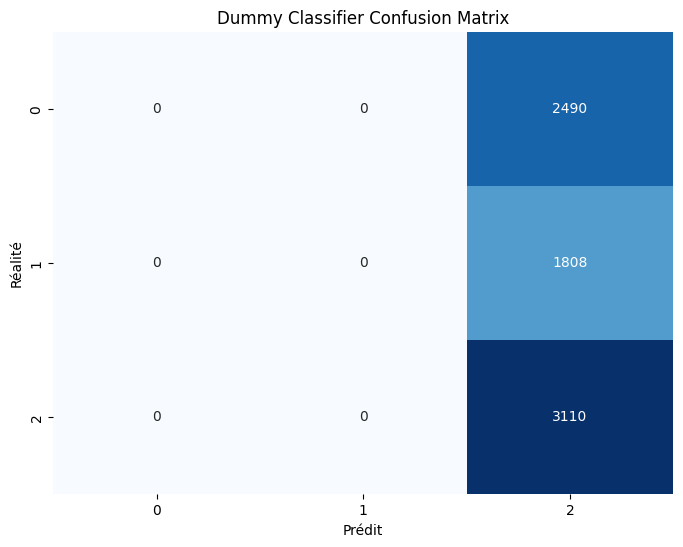

Regression Model
Accuracy:  0.6499730021598272
Precision:  0.6476300182525221
Recall:  0.6499730021598272
F1 Score:  0.6478673204627411


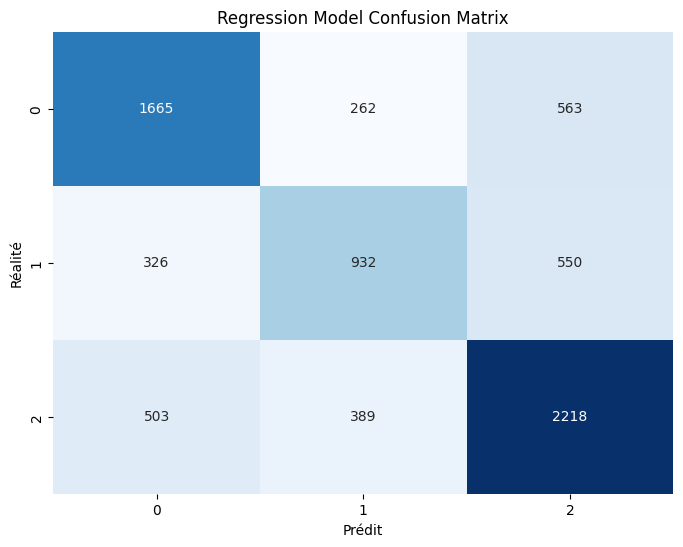

Neural Network Model
Accuracy:  0.6634719222462203
Precision:  0.6623375057882782
Recall:  0.6634719222462203
F1 Score:  0.6610304273984239


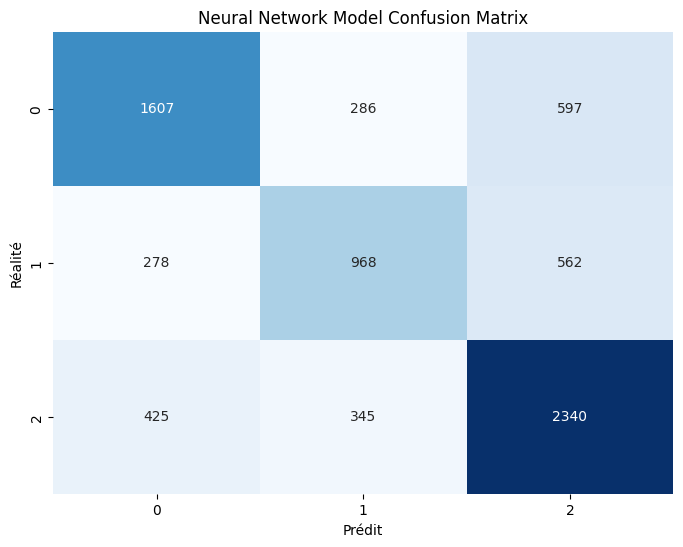

In [ ]:
print("Dummy Classifier")
print("Accuracy: ", dummy_accuracy)
print("Precision: ", dummy_precision)
print("Recall: ", dummy_recall)
print("F1 Score: ", dummy_f1)
plot_confusion_matrix(Y_valid, dummy_predictions, title="Dummy Classifier Confusion Matrix")

print("Regression Model")
print("Accuracy: ", regression_accuracy)
print("Precision: ", regression_precision)
print("Recall: ", regression_recall)
print("F1 Score: ", regression_f1)
plot_confusion_matrix(Y_valid, regression_predictions, title="Regression Model Confusion Matrix")

print("Neural Network Model")
print("Accuracy: ", nn_accuracy)
print("Precision: ", nn_precision)
print("Recall: ", nn_recall)
print("F1 Score: ", nn_f1)
plot_confusion_matrix(Y_valid, nn_predictions, title="Neural Network Model Confusion Matrix")

On remarque clairement que le modèle de regression logistique et le modèle de réseau de neurones sont les plus performants. Cependant, le modèle de réseau de neurones est plus performant que le modèle de regression logistique de peu avec les paramètres par défaut.

## Optimisation des hyperparamètres

### 7. **Modèle de référence :**

- Pour assurer une comparaison équitable avec notre modèle de référence, nous examinerons comment la variation des hyperparamètres affecte ses performances. Cela évite la conclusion erronée selon laquelle les réseaux de neurones sont intrinsèquement meilleurs, alors qu'en réalité, un ajustement adéquat des hyperparamètres pourrait améliorer les performances du modèle de référence.

- Concentrez-vous sur les hyperparamètres suivants pour chaque modèle :
  - [DecisionTreeClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html) : `criterion` et `max_depth`.
  - [LogisticRegression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html) : `penalty`, `max_iter`, et `tol`.
  - [KNeighborsClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) : `n_neighbors` et `weights`.

- Utilisez une stratégie de recherche par grille ou les méthodes intégrées de scikit-learn [GridSearchCV](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.GridSearchCV.html) pour évaluer de manière exhaustive toutes les combinaisons de valeurs d'hyperparamètres. La validation croisée doit être utilisée pour évaluer chaque combinaison.

- Quantifiez les performances de chaque configuration d'hyperparamètres en utilisant des métriques telles que la précision, le rappel et le score F1.

- Analysez les résultats et fournissez des aperçus sur quelles configurations d'hyperparamètres ont obtenu des performances optimales pour chaque modèle.

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category = ConvergenceWarning)

In [133]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

param_grid = {
    'penalty': ['l2', None],
    'max_iter': [200, 500, 1000],
    'tol': [1e-4, 1e-3, 1e-2],
}
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='weighted', zero_division=0),
    'recall': make_scorer(recall_score, average='weighted', zero_division=0),
    'f1': make_scorer(f1_score, average='weighted', zero_division=0)
}
grid_search = GridSearchCV(
    estimator=LogisticRegression(), 
    param_grid=param_grid,
    scoring=scoring,
    cv=8,
    refit='accuracy', 
    n_jobs=-1,
    error_score=np.nan
)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=8, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [200, 500, 1000], 'penalty': ['l2', None],
                         'tol': [0.0001, 0.001, 0.01]},
             refit='accuracy',
             scoring={'accuracy': 'accuracy',
                      'f1': make_scorer(f1_score, response_method='predict', average=weighted, zero_division=0),
                      'precision': make_scorer(precision_score, response_method='predict', average=weighted, zero_division=0),
                      'recall': make_scorer(recall_score, response_method='predict', average=weighted, zero_division=0)})

In [134]:
results = pd.DataFrame(grid_search.cv_results_)
results_summary = results[['params', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1']]
results_summary = results_summary.sort_values(by='mean_test_accuracy', ascending=False)
results_summary[['mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1']] = results_summary[
    ['mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1']
].round(3)
best_accuracy_config = results_summary.loc[results_summary['mean_test_accuracy'].idxmax()]
best_precision_config = results_summary.loc[results_summary['mean_test_precision'].idxmax()]
best_recall_config = results_summary.loc[results_summary['mean_test_recall'].idxmax()]
best_f1_config = results_summary.loc[results_summary['mean_test_f1'].idxmax()]

# Display the results in a styled table with a better color scheme
print("Grid Search Results Summary:")
display(results_summary.style.set_caption("Hyperparameter Tuning Results")
        .set_properties(**{'text-align': 'center'})
        .background_gradient(cmap="YlGnBu", subset=['mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1'])  # Subtle yellow-green-blue gradient
        .highlight_max(color="lightcoral", subset=['mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1'])  # Highlight max with a light coral color
        .hide()
        .set_table_styles([{'selector': 'caption', 'props': [('text-align', 'center'), ('font-size', '16px'), ('font-weight', 'bold')]}]))

# Display optimal configurations in a neatly formatted summary
print("\nOptimal Configurations:\n")
print(f"Best Configuration for Accuracy:\n{best_accuracy_config}\n")
print(f"Best Configuration for Precision:\n{best_precision_config}\n")
print(f"Best Configuration for Recall:\n{best_recall_config}\n")
print(f"Best Configuration for F1 Score:\n{best_f1_config}\n")

Grid Search Results Summary:



Optimal Configurations:

Best Configuration for Accuracy:
params                 {'max_iter': 1000, 'penalty': None, 'tol': 0.01}
mean_test_accuracy                                                0.699
mean_test_precision                                               0.698
mean_test_recall                                                  0.699
mean_test_f1                                                      0.697
Name: 17, dtype: object

Best Configuration for Precision:
params                 {'max_iter': 1000, 'penalty': None, 'tol': 0.01}
mean_test_accuracy                                                0.699
mean_test_precision                                               0.698
mean_test_recall                                                  0.699
mean_test_f1                                                      0.697
Name: 17, dtype: object

Best Configuration for Recall:
params                 {'max_iter': 1000, 'penalty': None, 'tol': 0.01}
mean_test_accuracy                

Après avoir optimisé les hyperparamètres, le modèle de regression logistique qui donne les meilleures performances pour toutes les métriques est celui avec les hyperparamètres suivants : `penalty=None, max_iter=1000, tol=0.01`.

### 8. **Réseau de neurones :**

Lors de notre exploration et ajustement des réseaux de neurones, nous nous concentrons sur les hyperparamètres suivants :

- **Une seule couche cachée, en variant le nombre de nœuds**. 
    - Commencez avec un seul nœud dans la couche cachée. Utilisez un graphique pour représenter l'évolution de la perte et de la précision pour les ensembles d'entraînement et de validation, avec l'axe horizontal représentant le nombre d'époques d'entraînement et l'axe vertical représentant la perte et la précision. L'entraînement de ce réseau devrait être relativement rapide, nous allons donc procéder à un entraînement sur 50 époques. Que concluez-vous de l'observation du graphique ? Le réseau sous-apprend-il ou surapprend-il ? Pourquoi ?

In [142]:
models_tracking = []
def plot_model(model, history, num_neurons, num_layers=3):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    ax1.plot(history.history['loss'], label='Training Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_title(f'Training and Validation Loss ({num_neurons} Neurons) ({num_layers} Layers)')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax2.plot(history.history['accuracy'], label='Training Accuracy')
    ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_title(f'Training and Validation Accuracy ({num_neurons} Neurons) ({num_layers} Layers)')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
def train_and_plot_model(num_neurons, num_epochs):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))
    model.add(layers.Dense(num_neurons, activation='relu'))  # Variable number of neurons in hidden layer
    model.add(layers.Dense(3, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, Y_train, epochs=num_epochs, batch_size=32, validation_data=(X_valid, Y_valid), verbose=0) # Epoch set to num_epochs
    models_tracking.append((model, history, '{} Neurons & {} Layers'.format(num_neurons, 3)))
    plot_model(model, history, num_neurons=str(num_neurons))

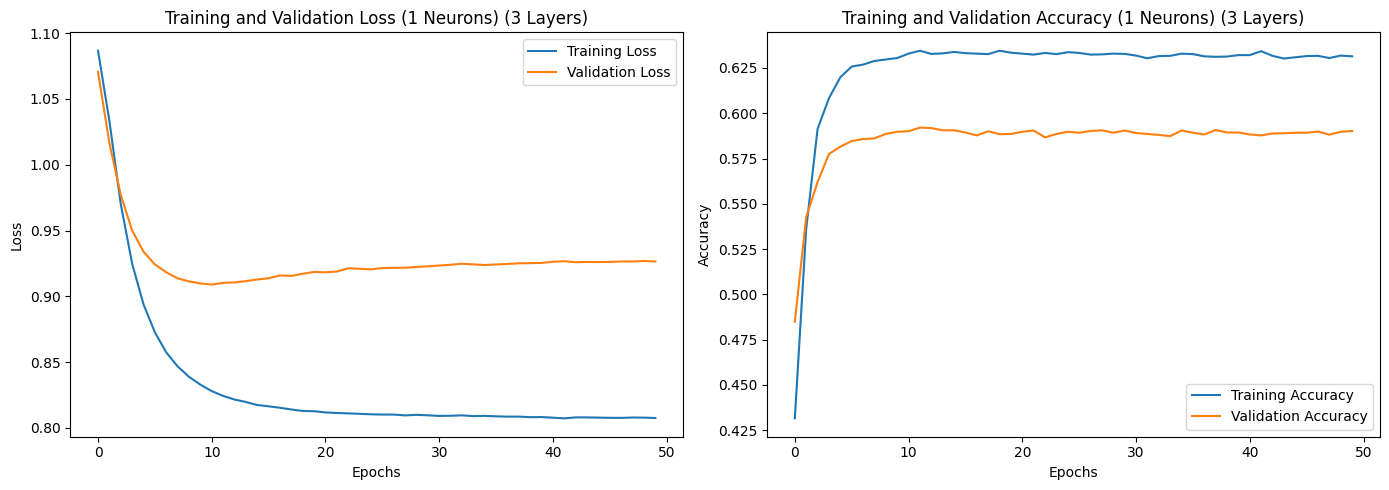

In [143]:
train_and_plot_model(1, 50)

Les performances du réseau de neuronnes avec une seule couche cachée et un seul noeud sont beaucoup moins impressionntes, cela est dû au fait que le réseau sous-apprend. En effet, le réseau n'a pas assez de noeuds pour apprendre les données.

- Répétez le processus ci-dessus en utilisant 2 et 4 nœuds dans la couche cachée. Utilisez le même type de graphique pour documenter vos observations concernant la perte et la précision.

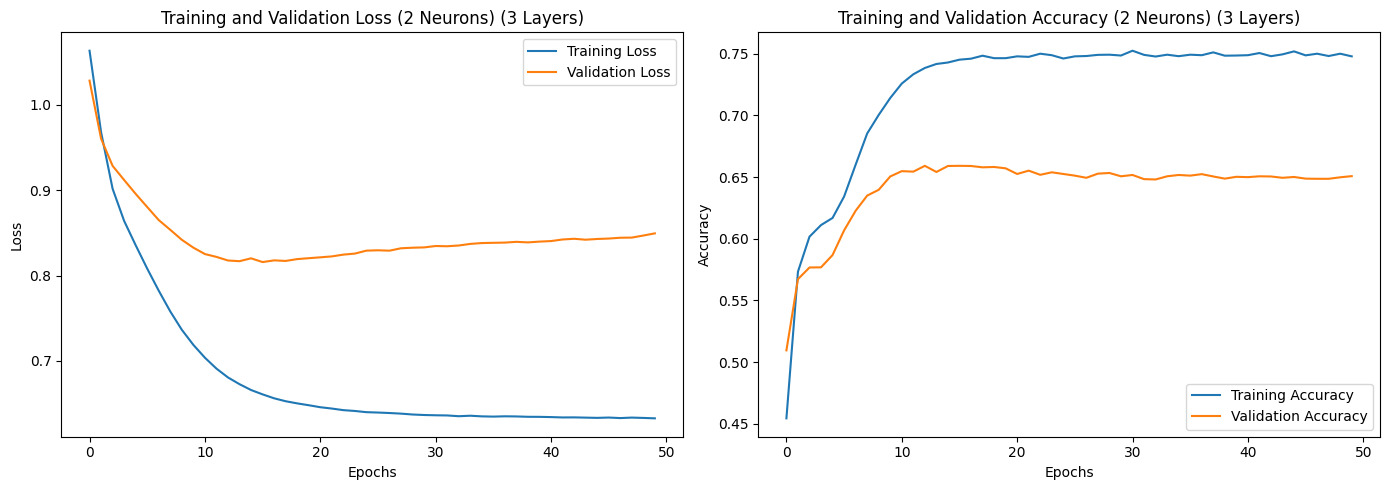

In [144]:
train_and_plot_model(2, 50)

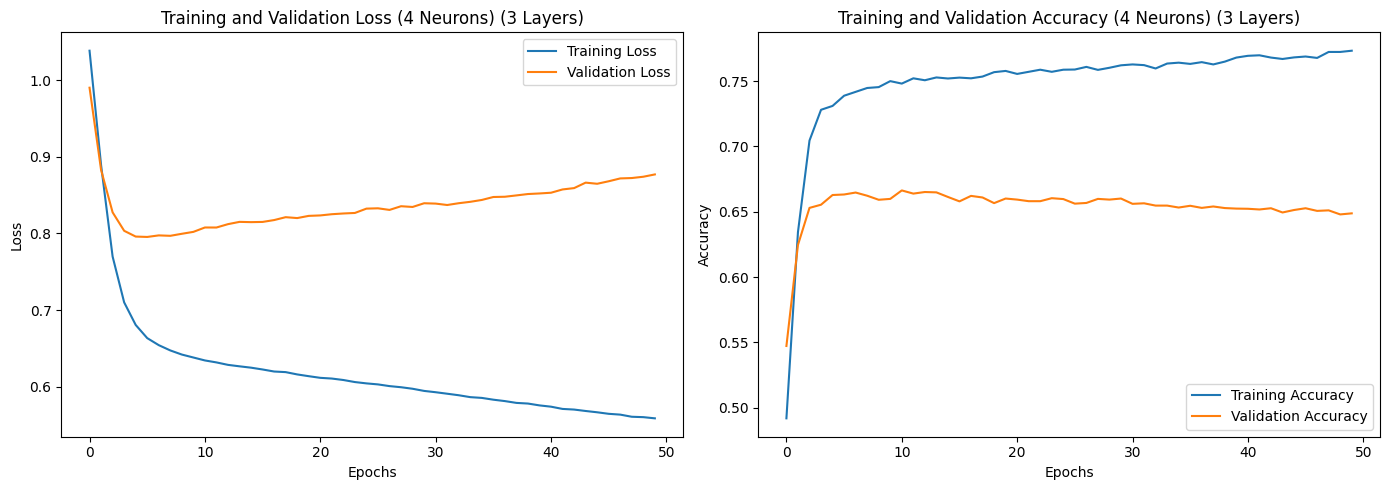

In [145]:
train_and_plot_model(4, 50)

On commence à voir une amélioration des performances du réseau de neuronnes avec 2 noeuds dans la couche cachée. Cependant, le réseau commence à surapprendre les données.

- Commencez avec 8 nœuds dans la couche cachée et doublez progressivement le nombre de nœuds jusqu'à ce qu'il dépasse le nombre de nœuds dans la couche d'entrée. Cela donne lieu à sept expériences et graphiques correspondants pour les configurations suivantes : 8, 16, 32, 64, 128, 256 et 512 nœuds. Documentez vos observations tout au long du processus.

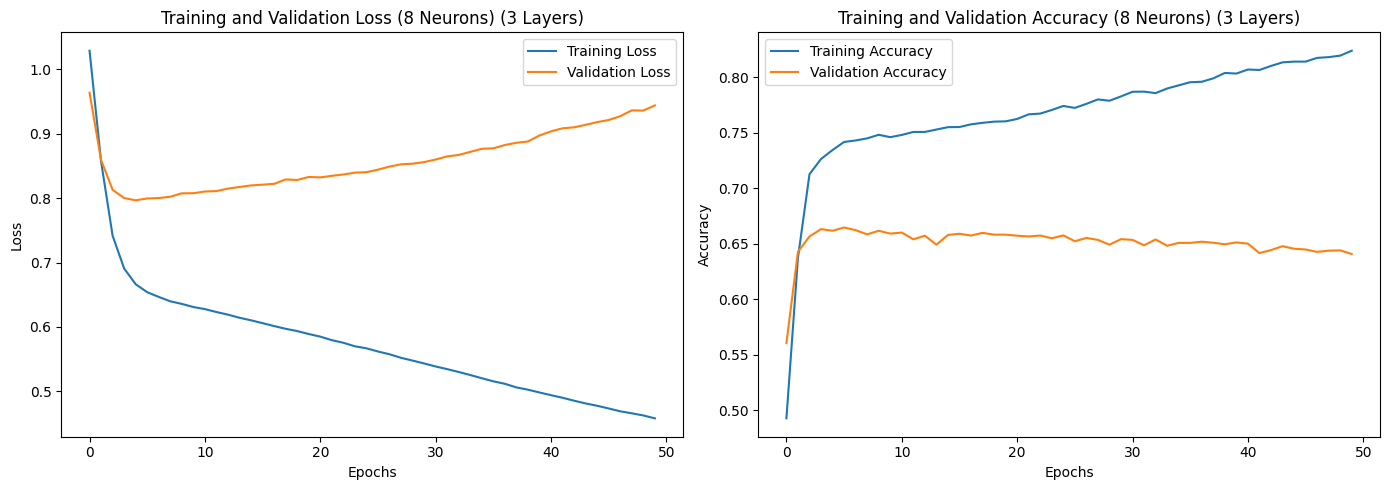

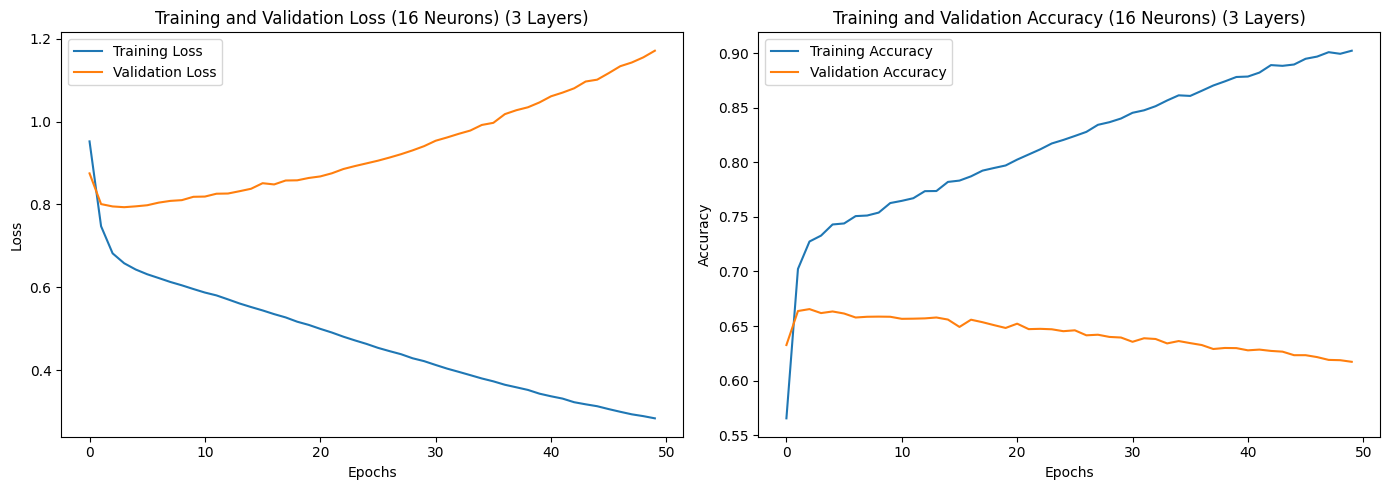

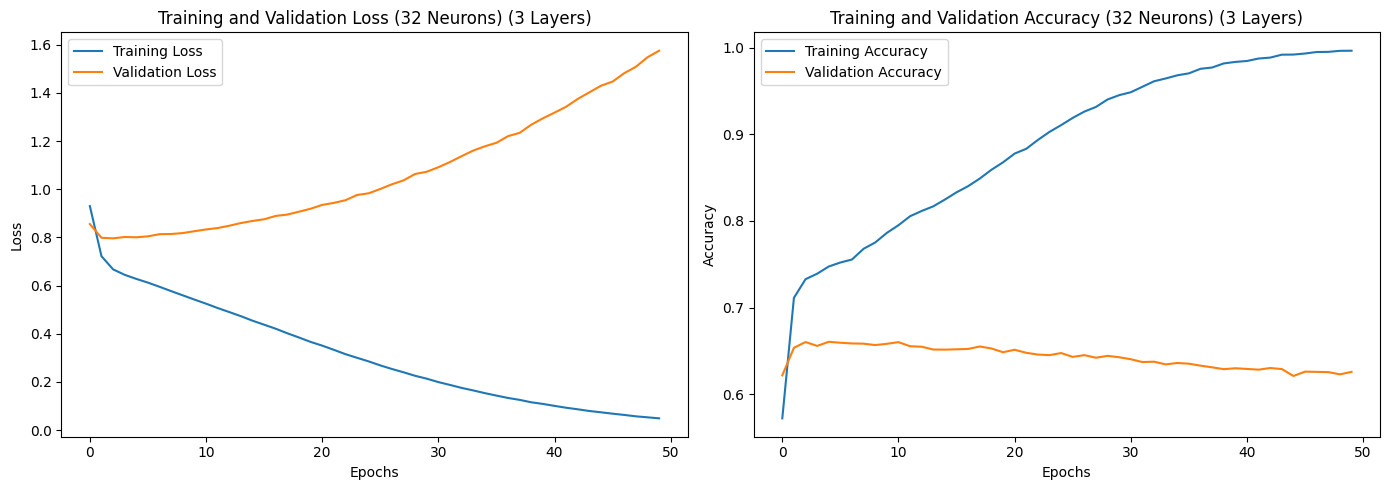

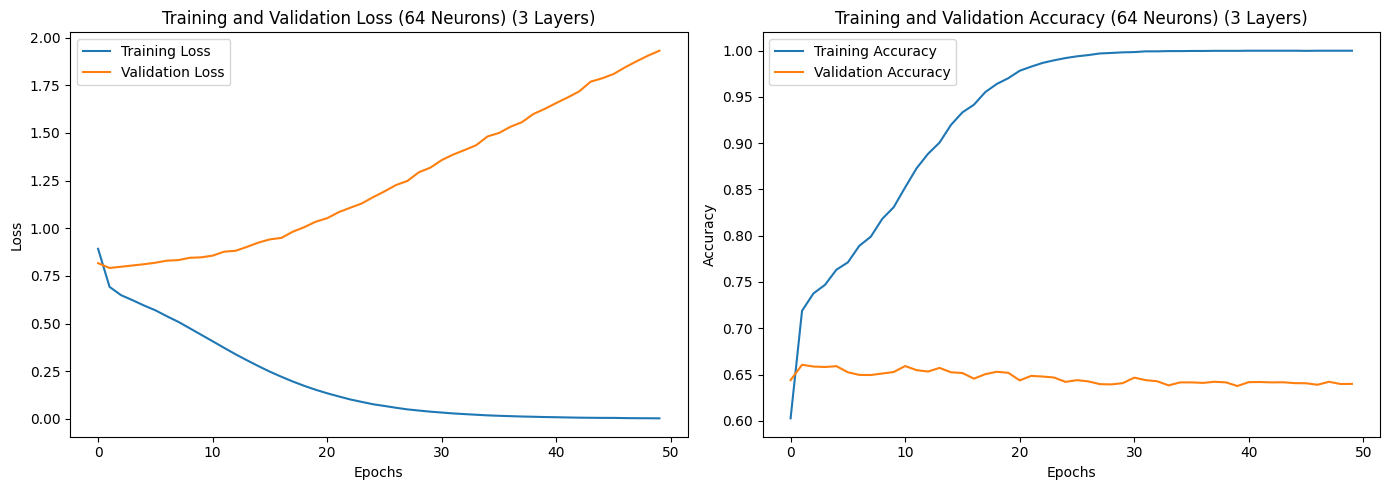

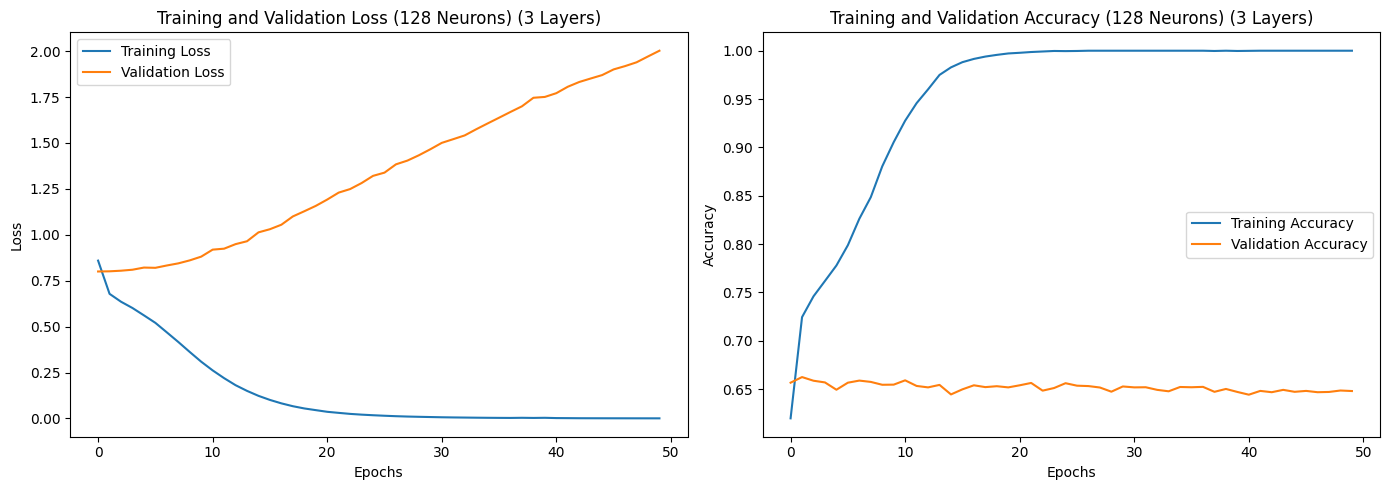

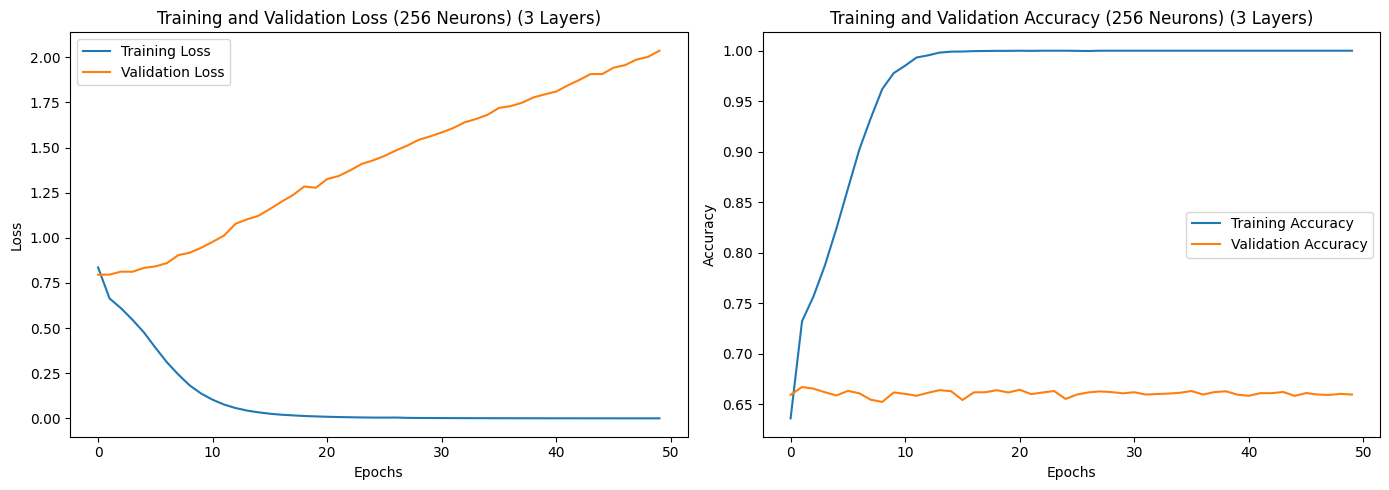

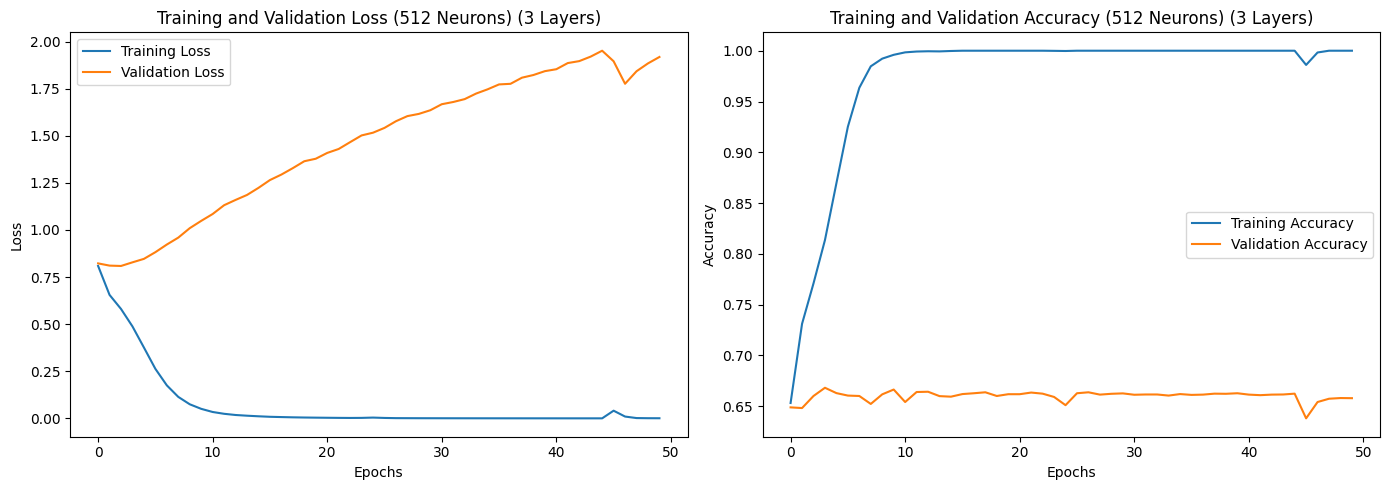

In [146]:
for neurons in [8, 16, 32, 64, 128, 256, 512]:
    train_and_plot_model(neurons, 50)

On remarque que le réseau de neuronnes commence clairement à surapprendre et qu'avec l'augmentation des neuronnes il converge de plus en plus rapidement vers une précision quasis parfaite sans réel progrès sur l'ensemble de validation.

- Assurez-vous que le **nombre d'époques d'entraînement** est suffisant pour **observer une augmentation de la perte de validation**. **Conseil** : Lors du développement du modèle, commencez avec un petit nombre d'époques, comme 5 ou 10. Une fois que le modèle semble bien fonctionner, testez avec des valeurs plus importantes, comme 40 ou 80 époques, ce qui s'est avéré raisonnable dans nos tests. En fonction de vos observations, envisagez de mener des expériences supplémentaires, si nécessaire. Combien d'époques ont finalement été nécessaires ?

In [153]:
def plot_model_performances(models_tracking):
    plt.figure(figsize=(14, 10))
    
    # Plot Loss for each model
    plt.subplot(2, 1, 1)
    for idx, (model, history, name) in enumerate(models_tracking, start=1):
        plt.plot(history.history['val_loss'], label=name)
        plt.plot(history.history['loss'], linestyle='--', label=name)
    plt.title('Model Loss Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.subplot(2, 1, 2)
    for idx, (model, history, name) in enumerate(models_tracking, start=1):
        plt.plot(history.history['val_accuracy'], label=name)
        plt.plot(history.history['accuracy'], linestyle='--', label=name)
    plt.title('Model Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

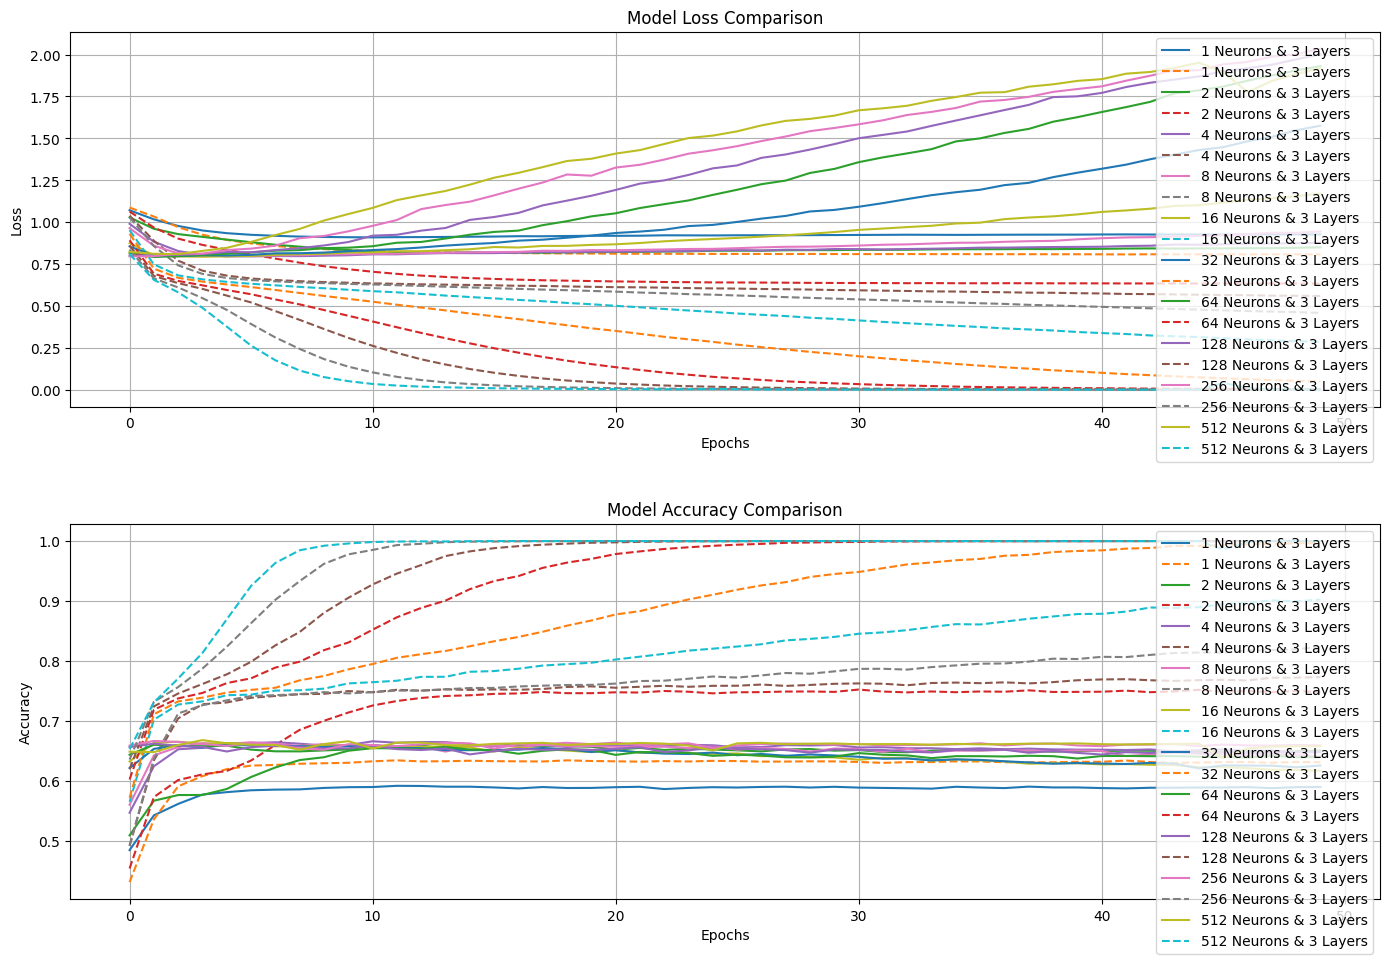

In [154]:
plot_model_performances(models_tracking)

50 époques ont été nécessaires pour observer une augmentation significative de la perte de validation. Beaucoup de modèles se sont stabilisés bien avant mais il a été utile de voir comment les performances évoluent avec le temps.

- **Variation du nombre de couches**
  - Réalisez des expériences similaires à celles décrites ci-dessus, mais cette fois en faisant varier le nombre de couches de 1 à 4. Documentez vos résultats.

In [155]:
def create_and_train_model(num_layers):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))
    for _ in range(num_layers):
        model.add(layers.Dense(8, activation='relu'))
        
    model.add(layers.Dense(3, activation='softmax')) 
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_valid, Y_valid), verbose=0)
    models_tracking.append((model, history))
    plot_model(model, history, 8, num_layers)

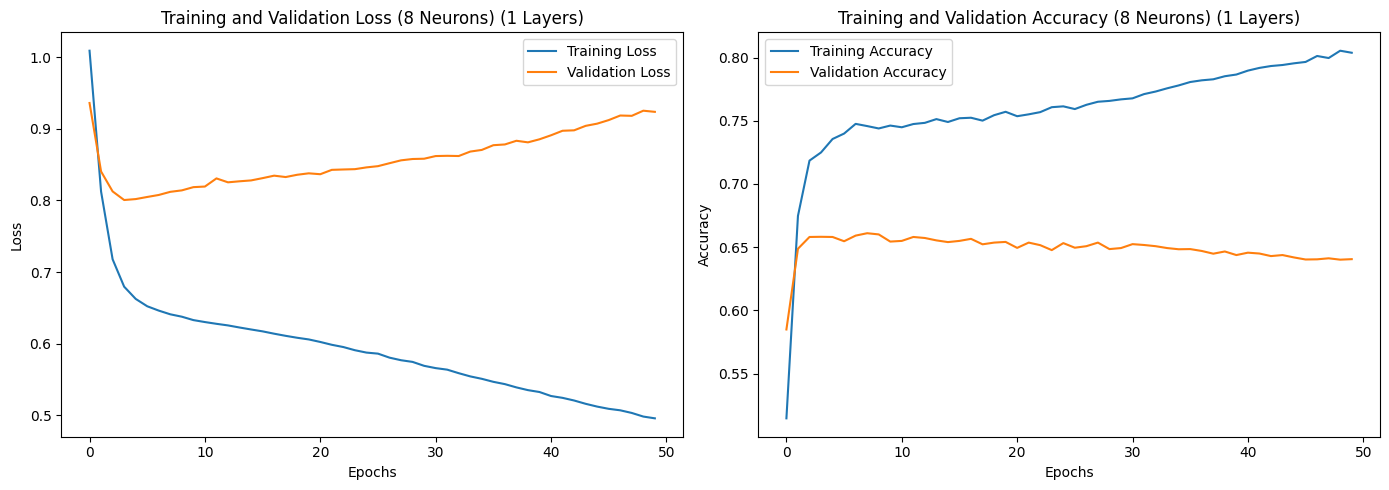

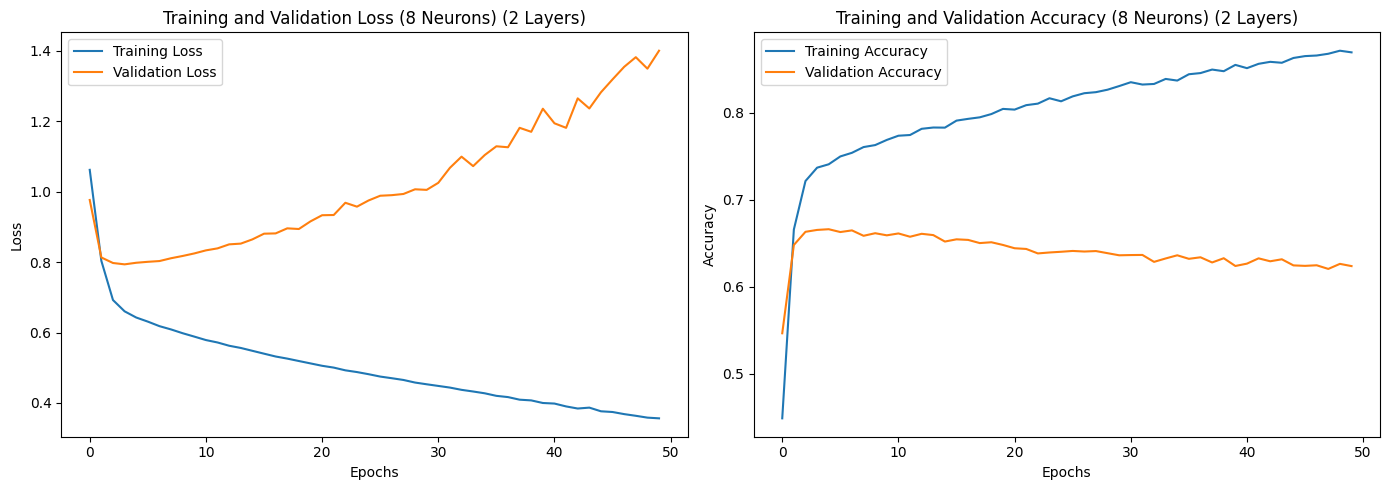

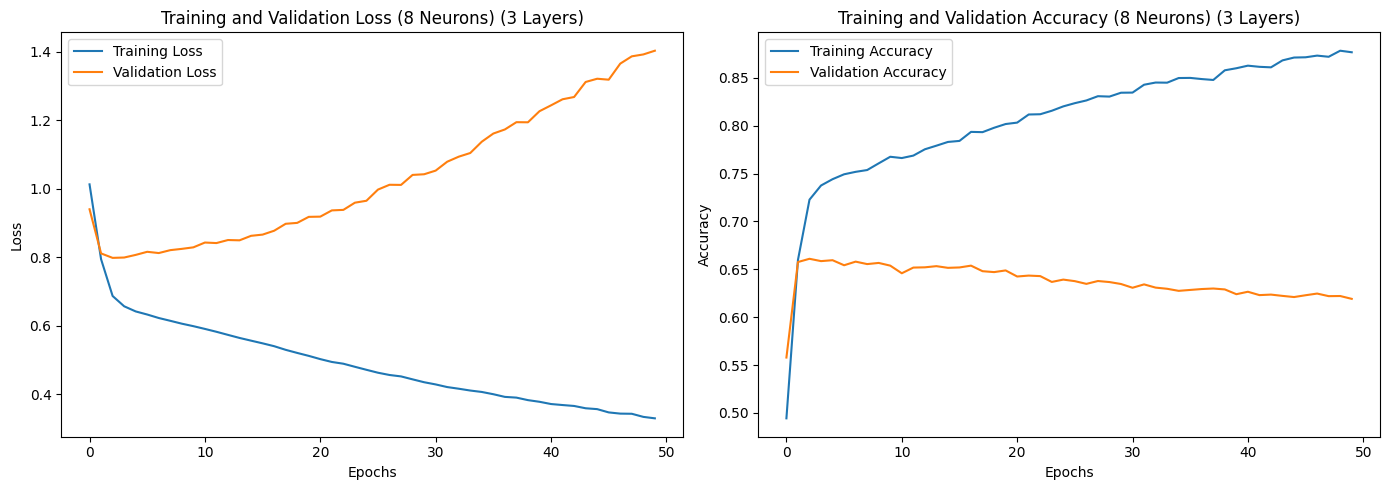

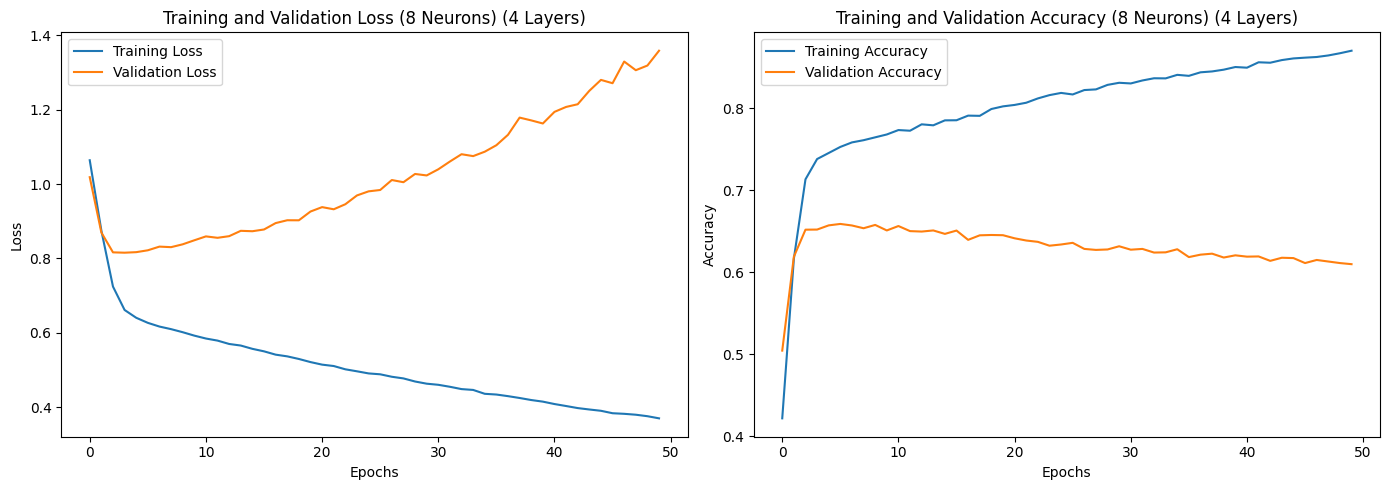

In [156]:
for layers_count in range(1, 5):
    create_and_train_model(layers_count)

On remarque clairement que le surapprentissage est plus prononcé avec l'augmentation du nombre de couches. Cela est dû au fait que le réseau de neuronnes a plus de paramètres à apprendre. Mais on remarque aussi que le surapprentissage est moins prononcé qu'avec une seule couche de plusieurs neuronnes. Ce qui pousse à croire que le réseau de neuronnes est plus performant avec plus d'une couche même si, en termes de résultats, il n'y a pas de différence significative.

- Combien de nœuds chaque couche devrait-elle contenir ? Testez au moins deux scénarios. Traditionnellement, une stratégie courante consistait à diminuer le nombre de nœuds de la couche d'entrée à la couche de sortie, souvent en divisant par deux, pour créer une structure en pyramide. Cependant, l'expérience récente suggère que le maintien d'un nombre constant de nœuds dans toutes les couches peut également bien fonctionner. Décrivez vos observations. Il est acceptable que les deux stratégies produisent des résultats similaires en termes de performance.

In [161]:
models_tracking_pyramid = []
models_tracking_constant = []
# Fonction pour créer et entraîner un modèle avec une structure en pyramide
def create_and_train_model_pyramid(num_layers, initial_neurons=64):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))
    neurons = initial_neurons
    for _ in range(num_layers):
        model.add(layers.Dense(neurons, activation='relu'))
        neurons = max(1, neurons // 2)  
    model.add(layers.Dense(3, activation='softmax')) 
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_valid, Y_valid), verbose=0)
    models_tracking_pyramid.append((model, history))
    if num_layers > 1: arrow = ' -> ' 
    else: arrow =''
    neurons_str = str(initial_neurons)+ arrow + ' -> '.join([str(max(1, initial_neurons // 2 ** i)) for i in range(1, num_layers)])
    plot_model(model, history, neurons_str, num_layers)

# Fonction pour créer et entraîner un modèle avec une structure à nœuds constants
def create_and_train_model_constant(num_layers, neurons=32):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))
    for _ in range(num_layers):
        model.add(layers.Dense(neurons, activation='relu'))
    model.add(layers.Dense(3, activation='softmax')) 
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_valid, Y_valid), verbose=0)
    models_tracking_constant.append((model, history))
    plot_model(model, history, neurons, num_layers)

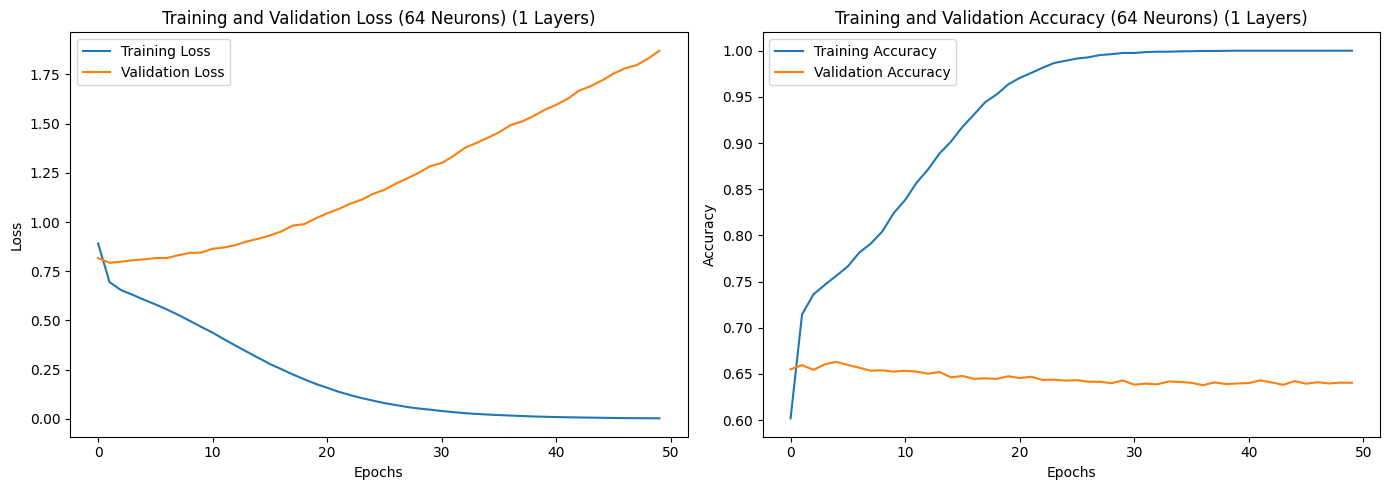

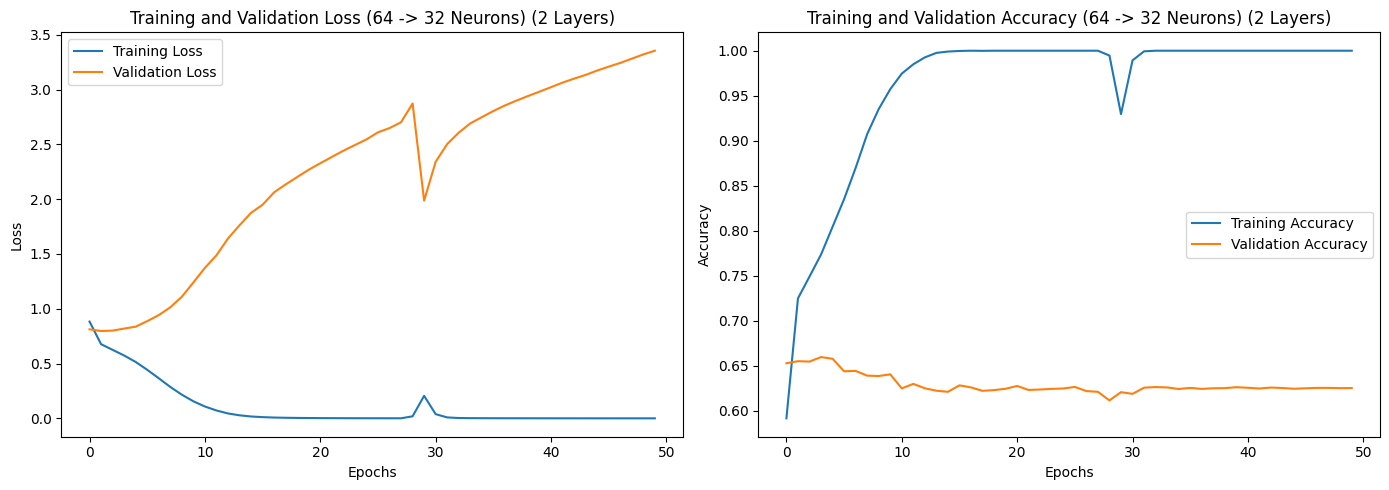

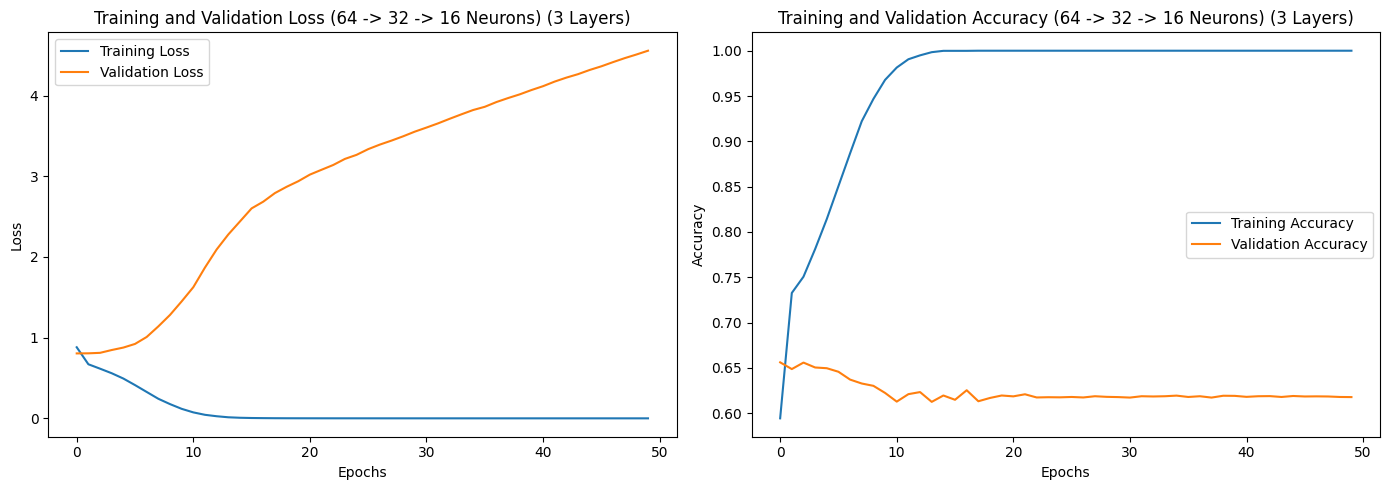

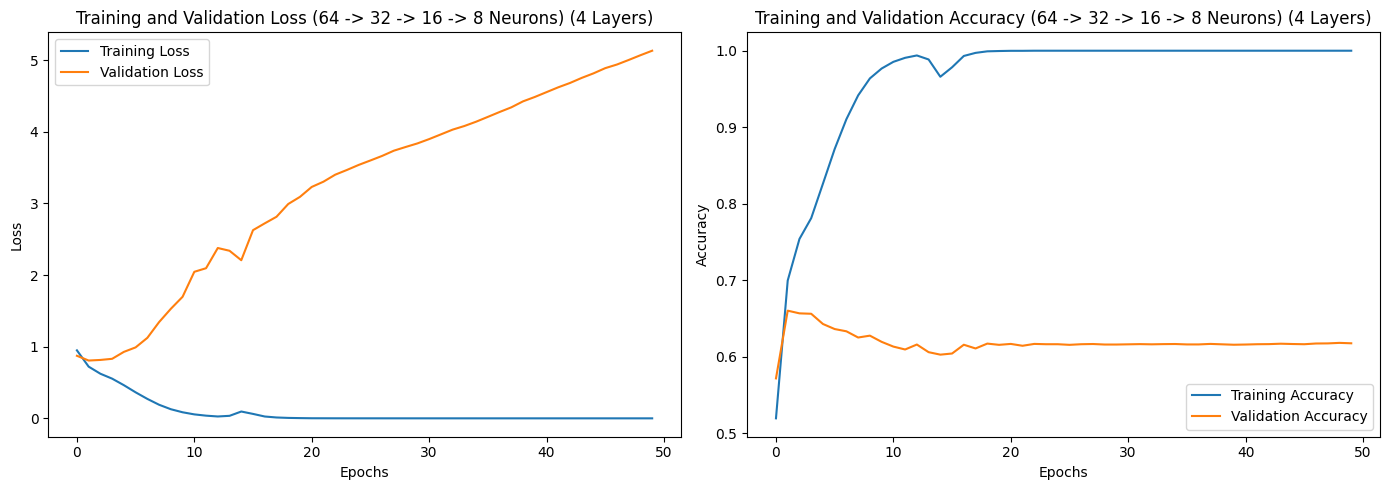

In [162]:
for layers_count in range(1, 5):
    create_and_train_model_pyramid(layers_count)

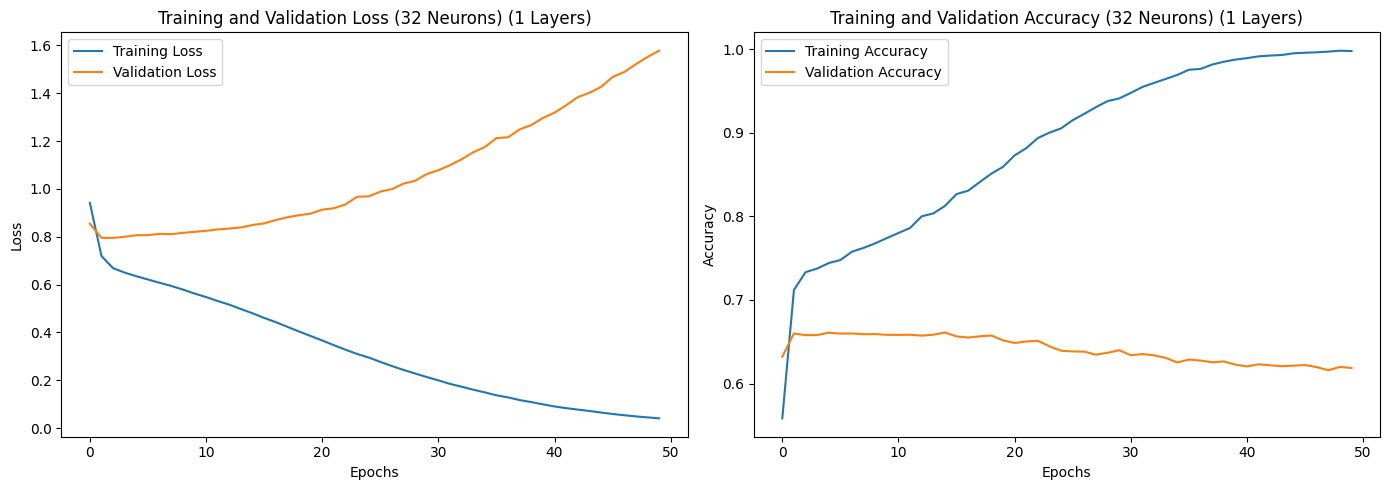

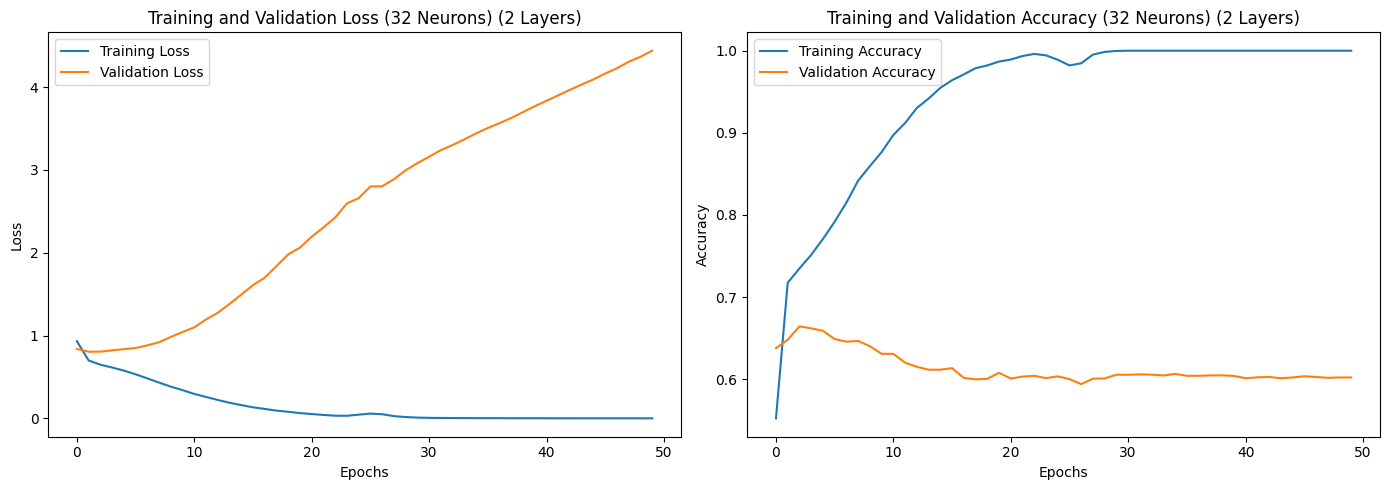

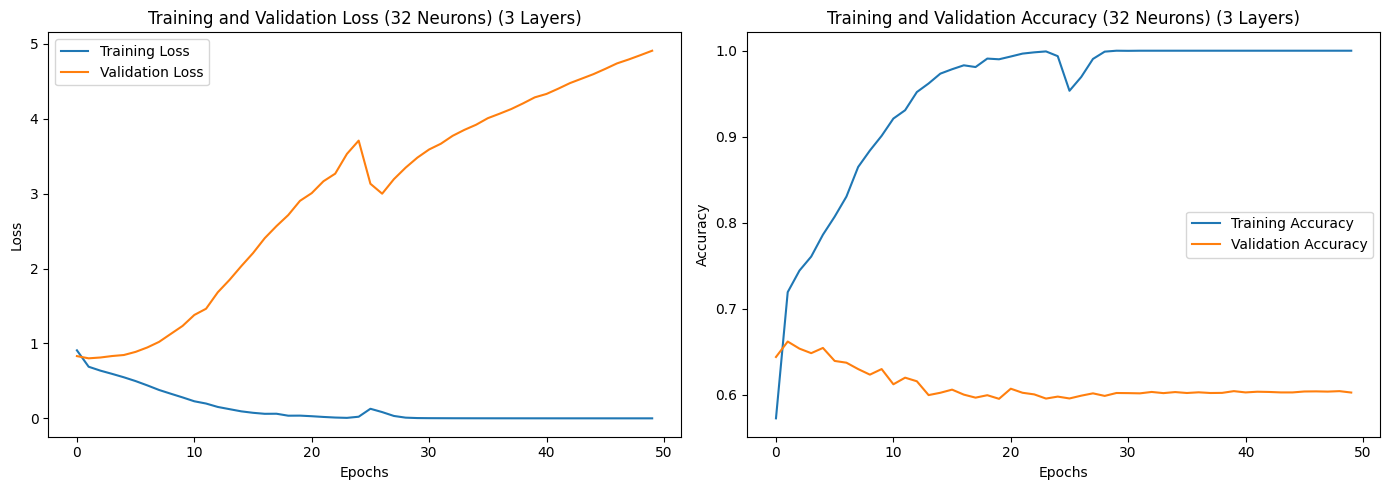

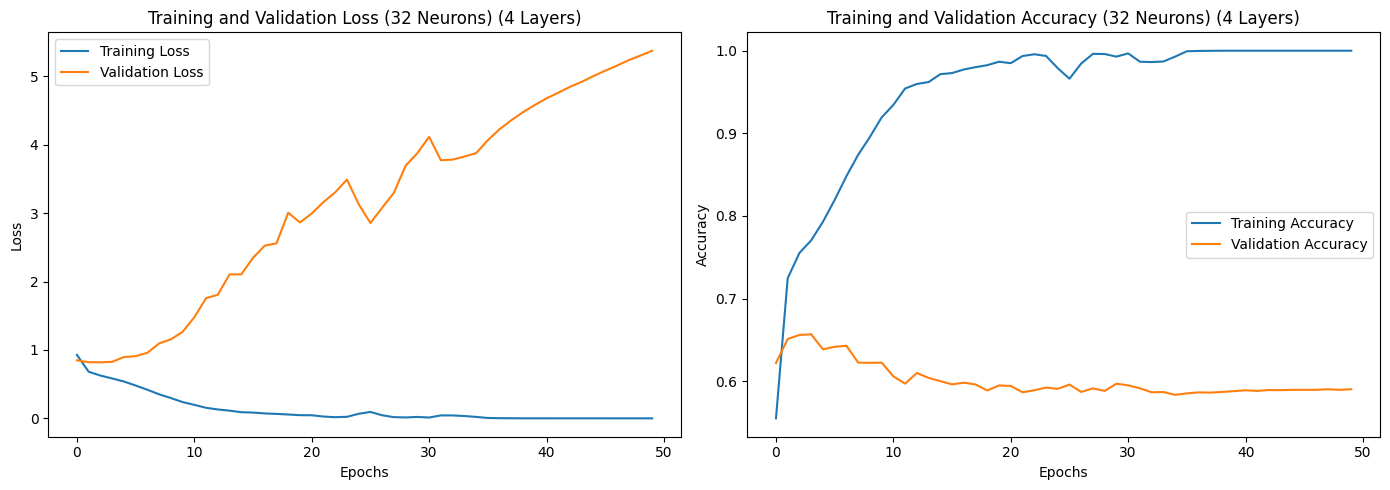

In [163]:
for layers_count in range(1, 5):
    create_and_train_model_constant(layers_count)

On remarque clairement que le même phénomène de surapprentissage se produit avec une structure en pyramide et un nombre constant de neurones. Tout les modèles, jusque là, n'ont eu aucune différence significative en termes de performances malgrès une performance clairement meilleures sur l'ensemble d'entraînement.

In [164]:
def plot_model_performances(models_tracking, title):
    plt.figure(figsize=(14, 10))
    
    # Graphique de la perte pour chaque modèle
    plt.subplot(2, 1, 1)
    for idx, (model, history) in enumerate(models_tracking, start=1):
        plt.plot(history.history['val_loss'], label=f'{title} - {idx} Couche(s) Validation Loss')
        plt.plot(history.history['loss'], linestyle='--', label=f'{title} - {idx} Couche(s) Training Loss')
    plt.title(f'{title} - Comparaison de la Perte')
    plt.xlabel('Époques')
    plt.ylabel('Perte')
    plt.legend()
    plt.grid(True)
    
    # Graphique de l'exactitude pour chaque modèle
    plt.subplot(2, 1, 2)
    for idx, (model, history) in enumerate(models_tracking, start=1):
        plt.plot(history.history['val_accuracy'], label=f'{title} - {idx} Couche(s) Validation Accuracy')
        plt.plot(history.history['accuracy'], linestyle='--', label=f'{title} - {idx} Couche(s) Training Accuracy')
    plt.title(f'{title} - Comparaison de l\'Exactitude')
    plt.xlabel('Époques')
    plt.ylabel('Exactitude')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

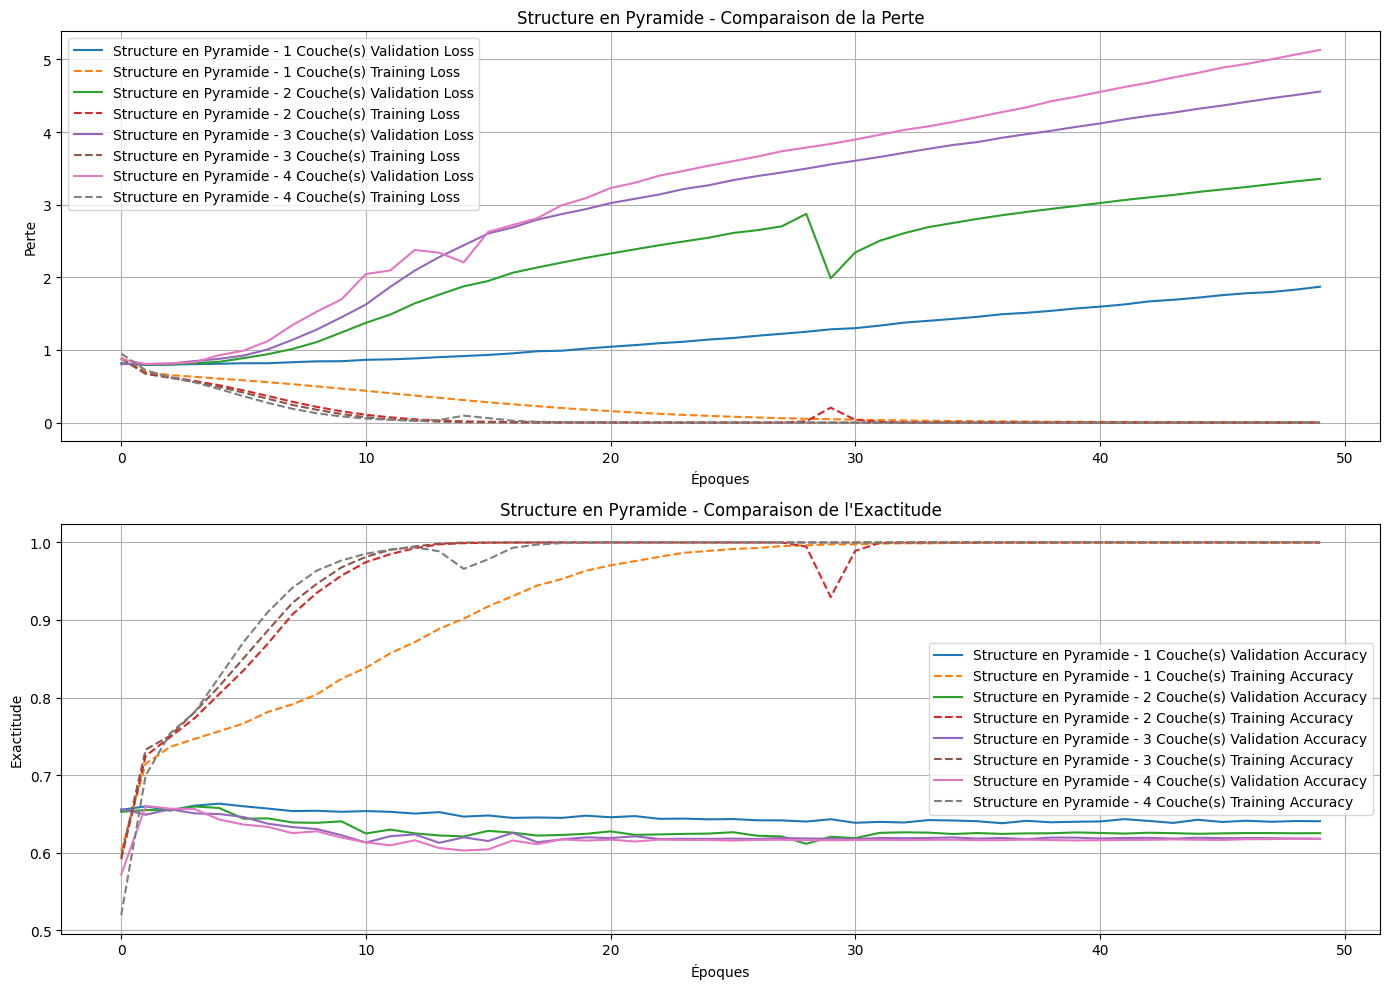

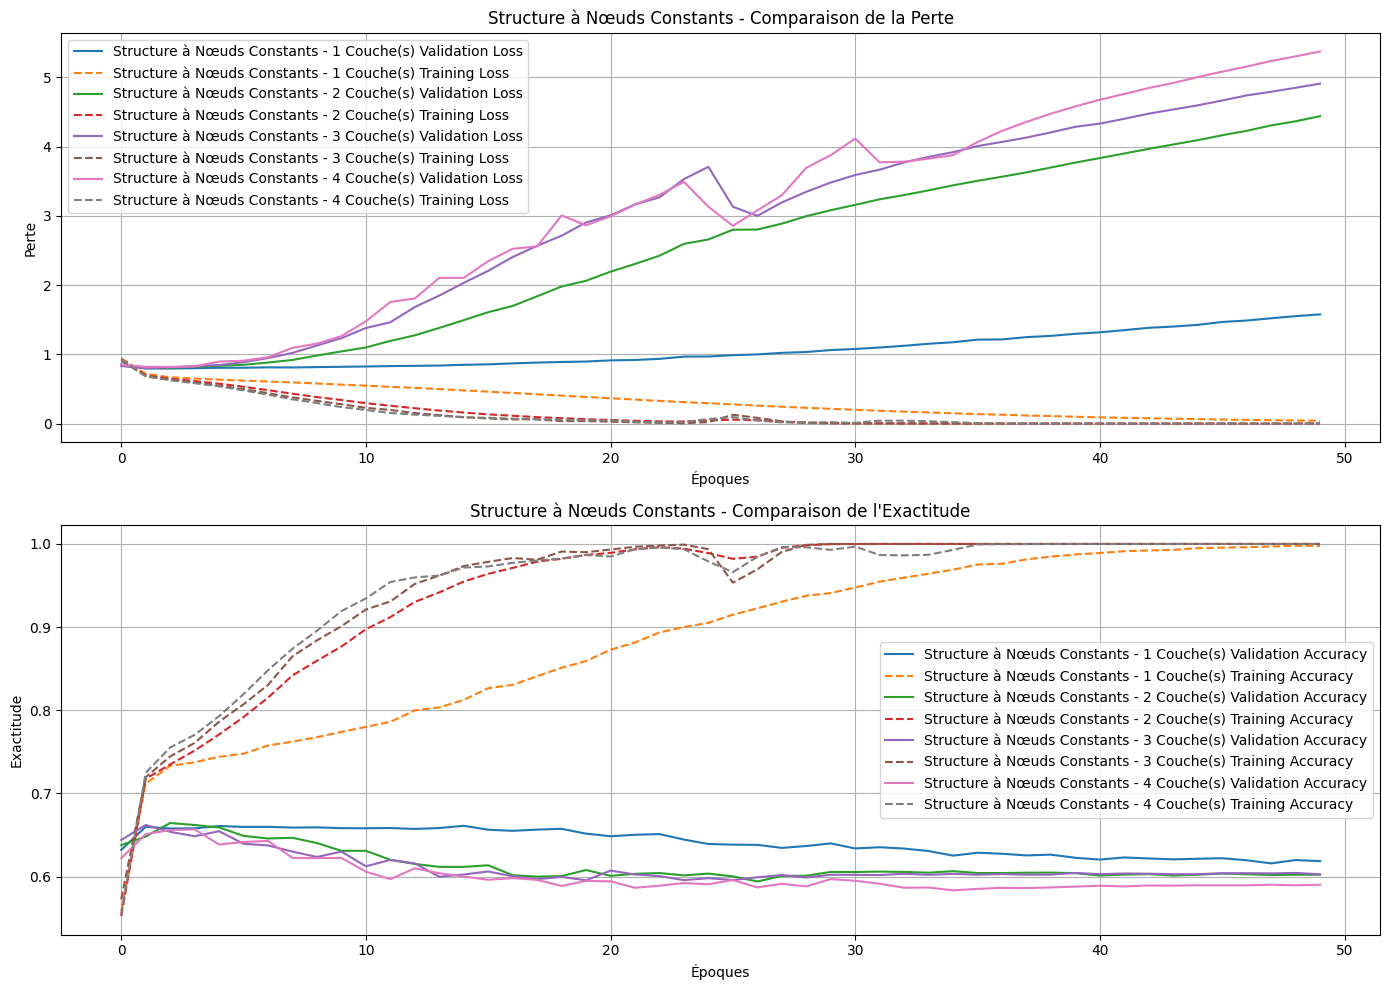

In [165]:
plot_model_performances(models_tracking_pyramid, 'Structure en Pyramide')
plot_model_performances(models_tracking_constant, 'Structure à Nœuds Constants')

- Sélectionnez un de vos modèles qui illustre le surapprentissage. Dans nos expériences, nous avons facilement construit un modèle atteignant près de 100 % de précision sur les données d'entraînement, sans aucune amélioration similaire sur l'ensemble de validation. Présentez ce réseau de neurones avec ses graphiques de précision et de perte. Expliquez pourquoi vous concluez que le modèle surapprend.

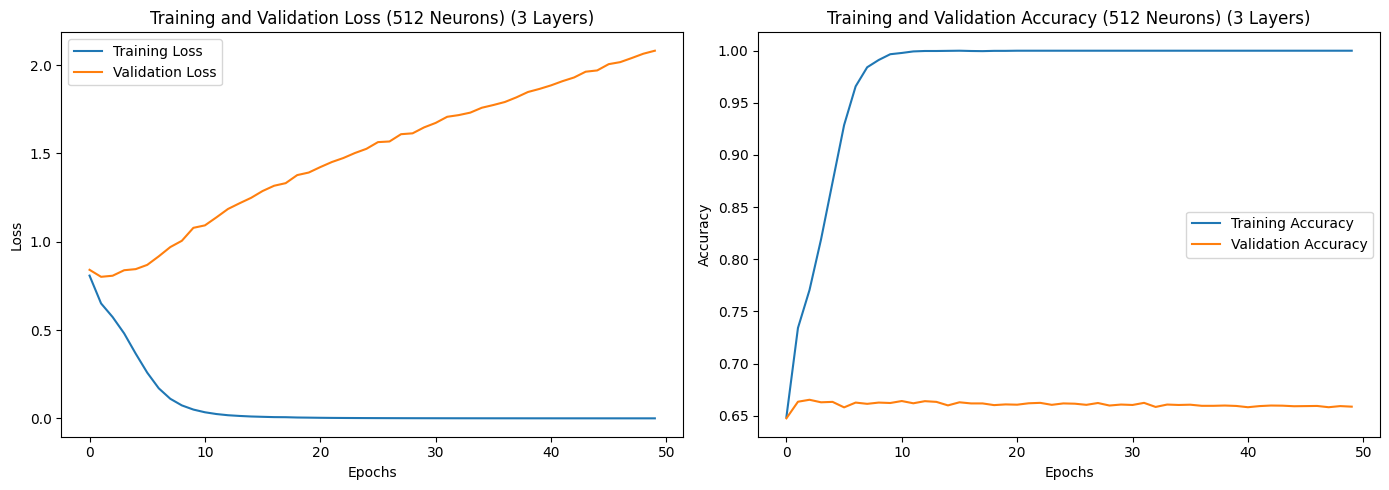

In [166]:
train_and_plot_model(512, 50)

On peut clairement voir que le modèle surapprend avec 512 neurones dans la couche cachée. En effet, la précision sur l'ensemble d'entraînement est de 100% alors que la précision sur l'ensemble de validation est de 65%. Cela est dû au fait que le modèle a trop de paramètres à apprendre et qu'il apprend trop bien les données d'entraînement.
Aussi, le fait qu'une progression sur l'emsemble d'entraînement ne se traduit pas par une progression sur l'ensemble de validation est un signe clair de surapprentissage.

- **Fonction d'activation**
  - Présentez les résultats pour une des configurations mentionnées ci-dessus en variant la fonction d'activation. Testez au moins `relu` (le paramètre par défaut) et `sigmoid`. Le choix du modèle spécifique, y compris le nombre de couches et de nœuds, est à votre discrétion. Documentez vos observations en conséquence.

In [167]:
def create_and_train_model(activation_function):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))
    model.add(layers.Dense(8, activation=activation_function))
    model.add(layers.Dense(8, activation=activation_function))
    model.add(layers.Dense(3, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_valid, Y_valid), verbose=0)
    return history

In [168]:
history_relu = create_and_train_model('relu')
history_sigmoid = create_and_train_model('sigmoid')

In [169]:
def plot_activation_comparison(history_relu, history_sigmoid):
    plt.figure(figsize=(14, 10))
    plt.subplot(2, 1, 1)
    plt.plot(history_relu.history['val_loss'], label='Validation Loss (ReLU)')
    plt.plot(history_relu.history['loss'], linestyle='--', label='Training Loss (ReLU)')
    plt.plot(history_sigmoid.history['val_loss'], label='Validation Loss (Sigmoid)')
    plt.plot(history_sigmoid.history['loss'], linestyle='--', label='Training Loss (Sigmoid)')
    plt.title('Comparaison de la Perte - ReLU vs Sigmoid')
    plt.xlabel('Époques')
    plt.ylabel('Perte')
    plt.legend()
    plt.grid(True)
    plt.subplot(2, 1, 2)
    plt.plot(history_relu.history['val_accuracy'], label='Validation Accuracy (ReLU)')
    plt.plot(history_relu.history['accuracy'], linestyle='--', label='Training Accuracy (ReLU)')
    plt.plot(history_sigmoid.history['val_accuracy'], label='Validation Accuracy (Sigmoid)')
    plt.plot(history_sigmoid.history['accuracy'], linestyle='--', label='Training Accuracy (Sigmoid)')
    plt.title('Comparaison de l\'Exactitude - ReLU vs Sigmoid')
    plt.xlabel('Époques')
    plt.ylabel('Exactitude')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

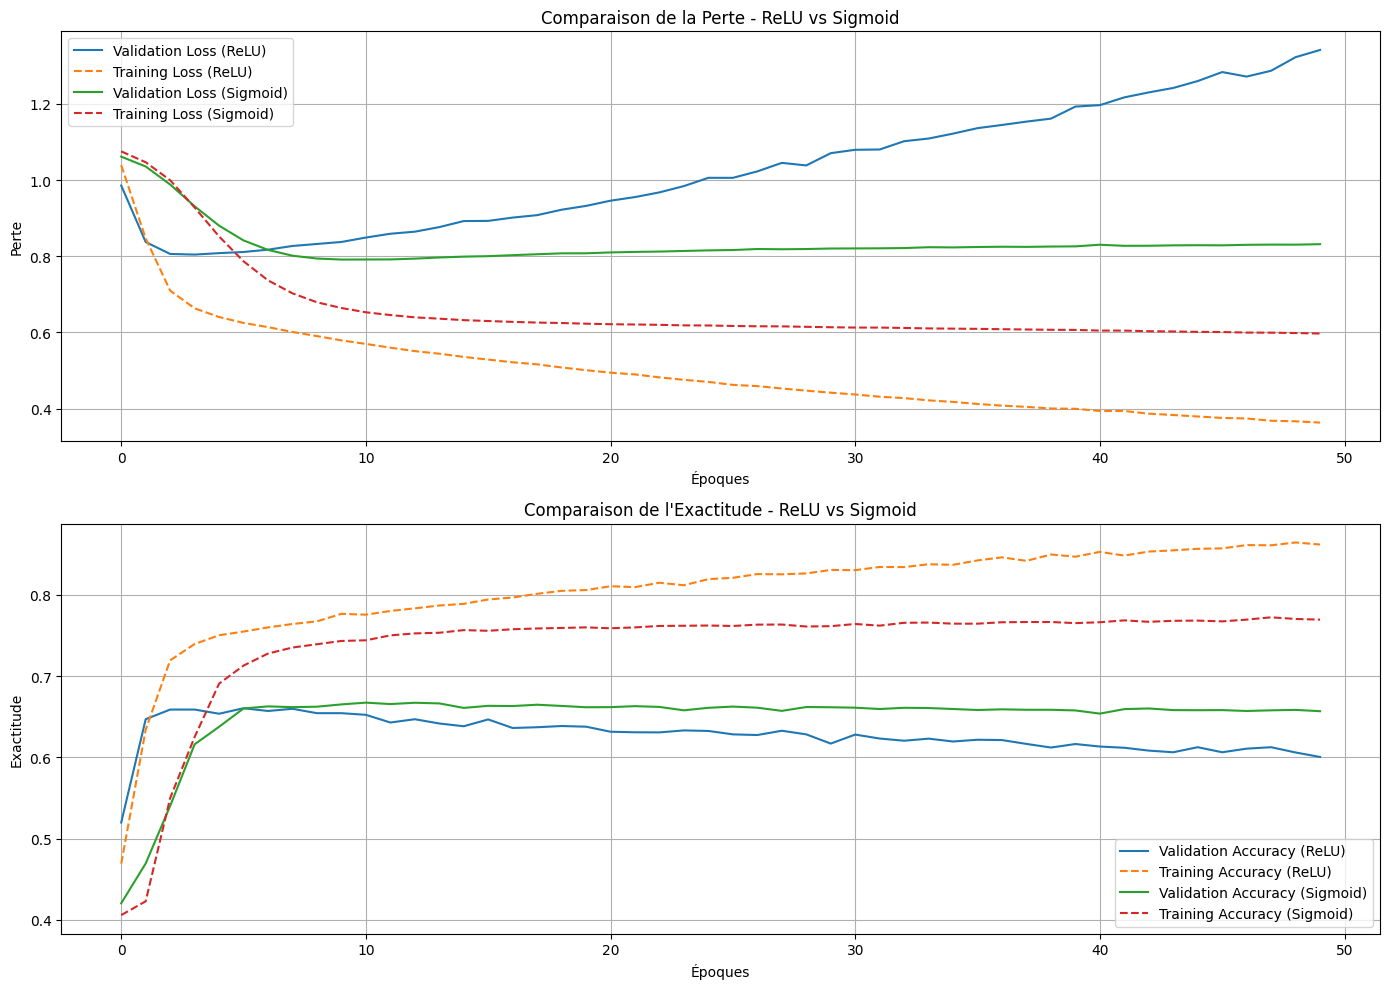

In [170]:
plot_activation_comparison(history_relu, history_sigmoid)

La fonction d'activation `sigmoid` donne des résultats meilleurs que la fonction d'activation `relu`. Mais les résultats ne sont pas significativement meilleurs et ne seront pas extrapolés avec l'augmentation du nombre de couches ou de neurones.

- **Régularisation** dans les réseaux de neurones est une technique utilisée pour éviter le surapprentissage.
  - Une technique consiste à ajouter une pénalité à la fonction de perte pour décourager les modèles excessivement complexes. Appliquez une pénalité `l2` à certaines ou à toutes les couches. Soyez prudent, car des pénalités trop agressives se sont révélées problématiques dans nos expériences. Commencez avec la valeur par défaut `l2` de 0.01, puis réduisez-la à 0.001 et à 1e-4. Sélectionnez un modèle spécifique parmi les expériences ci-dessus et présentez un cas où vous avez réussi à réduire le surapprentissage. Incluez une paire de graphiques comparant les résultats avec et sans régularisation. Expliquez votre raisonnement pour conclure que le surapprentissage a été réduit. N'espérez pas éliminer complètement le surapprentissage. Encore une fois, il s'agit d'un ensemble de données difficile à travailler.

In [171]:
def create_and_train_model_l2(l2_value=None):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))
    if l2_value:
        model.add(layers.Dense(8, activation='relu', kernel_regularizer=keras.regularizers.l2(l2_value)))
        model.add(layers.Dense(8, activation='relu', kernel_regularizer=keras.regularizers.l2(l2_value)))
    else:
        model.add(layers.Dense(8, activation='relu'))
        model.add(layers.Dense(8, activation='relu'))
        
    model.add(layers.Dense(3, activation='softmax')) 
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_valid, Y_valid), verbose=0)
    
    return history

In [172]:
history_no_reg = create_and_train_model_l2()
history_l2_0_01 = create_and_train_model_l2(l2_value=0.01)
history_l2_0_001 = create_and_train_model_l2(l2_value=0.001)
history_l2_1e_4 = create_and_train_model_l2(l2_value=1e-4)

In [173]:
def plot_regularization_comparison(history_no_reg, history_l2, title):
    plt.figure(figsize=(14, 10))
    plt.subplot(2, 1, 1)
    plt.plot(history_no_reg.history['val_loss'], label='Validation Loss (Sans Régularisation)')
    plt.plot(history_no_reg.history['loss'], linestyle='--', label='Training Loss (Sans Régularisation)')
    plt.plot(history_l2.history['val_loss'], label=f'Validation Loss (Régularisation {title})')
    plt.plot(history_l2.history['loss'], linestyle='--', label=f'Training Loss (Régularisation {title})')
    plt.title(f'Comparaison de la Perte - Avec et Sans Régularisation (L2={title})')
    plt.xlabel('Époques')
    plt.ylabel('Perte')
    plt.legend()
    plt.grid(True)
    plt.subplot(2, 1, 2)
    plt.plot(history_no_reg.history['val_accuracy'], label='Validation Accuracy (Sans Régularisation)')
    plt.plot(history_no_reg.history['accuracy'], linestyle='--', label='Training Accuracy (Sans Régularisation)')
    plt.plot(history_l2.history['val_accuracy'], label=f'Validation Accuracy (Régularisation {title})')
    plt.plot(history_l2.history['accuracy'], linestyle='--', label=f'Training Accuracy (Régularisation {title})')
    plt.title(f'Comparaison de l\'Exactitude - Avec et Sans Régularisation (L2={title})')
    plt.xlabel('Époques')
    plt.ylabel('Exactitude')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

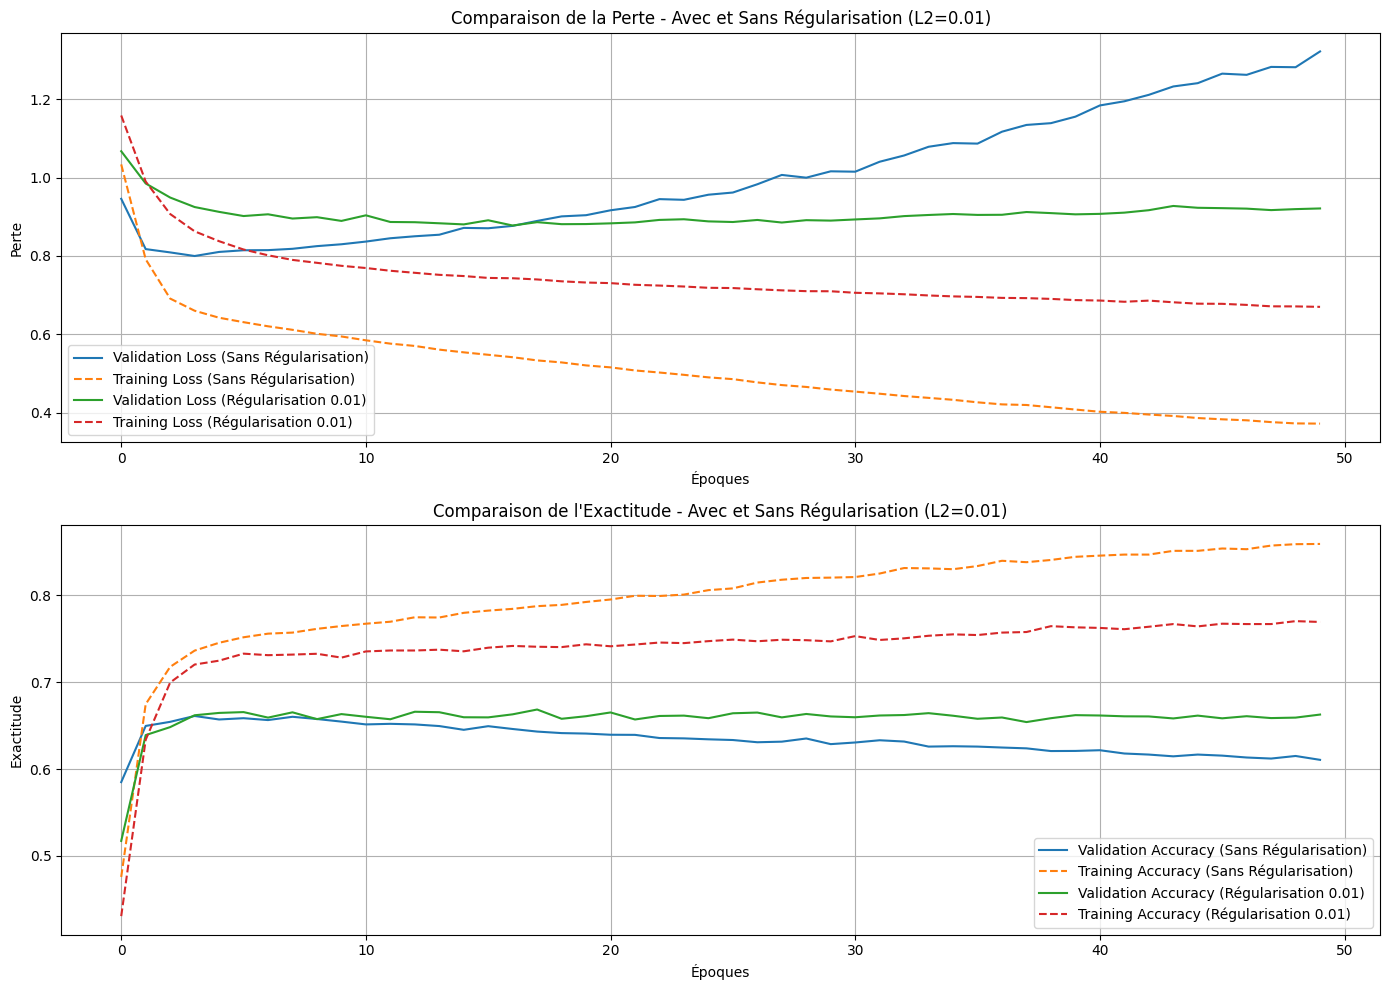

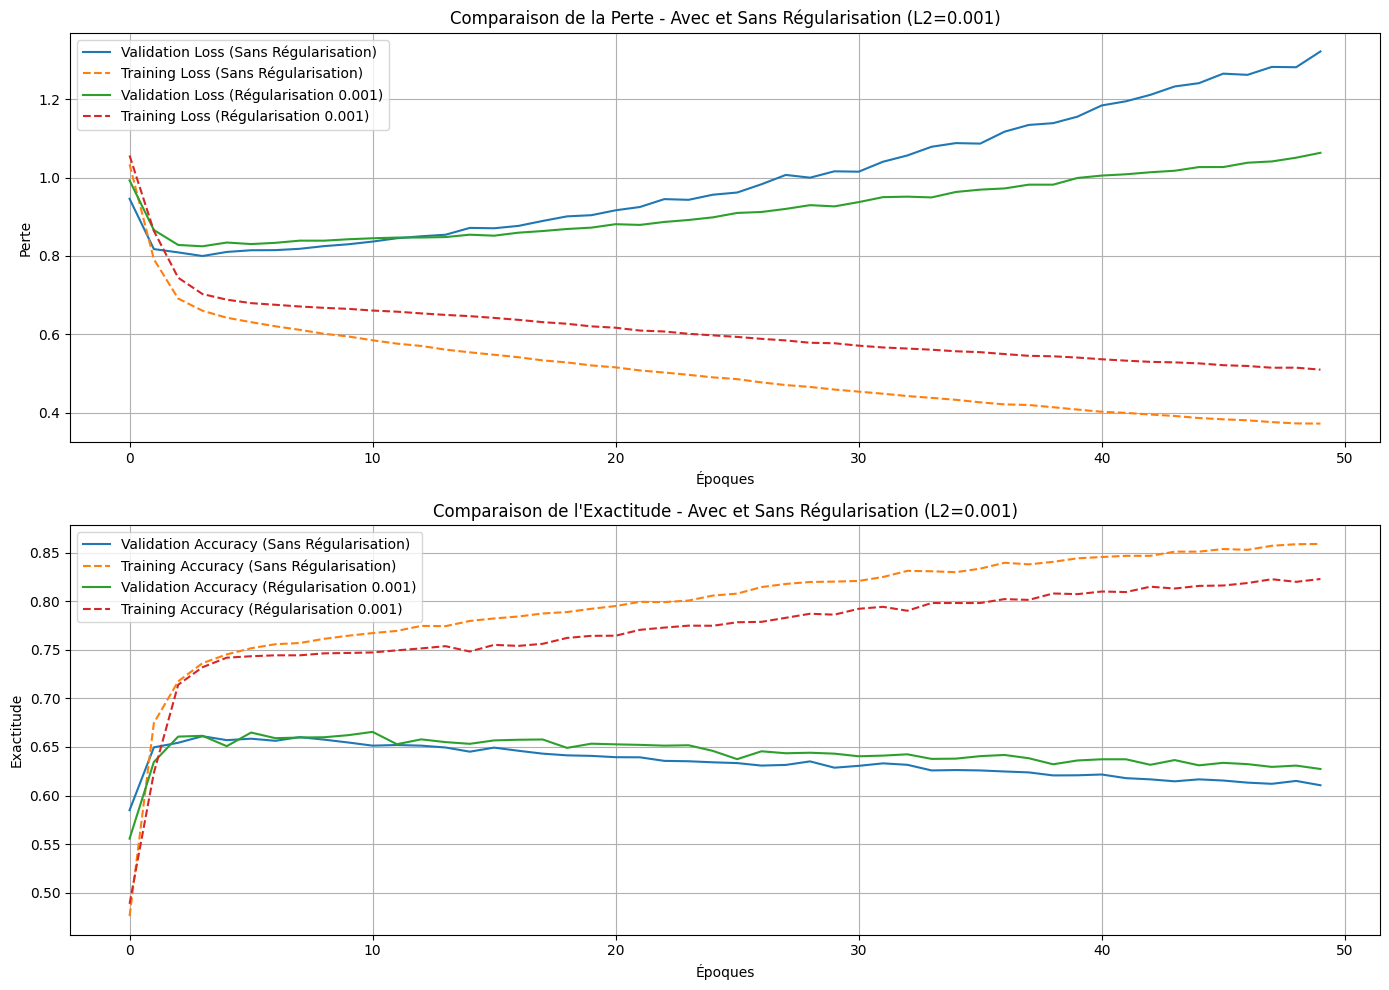

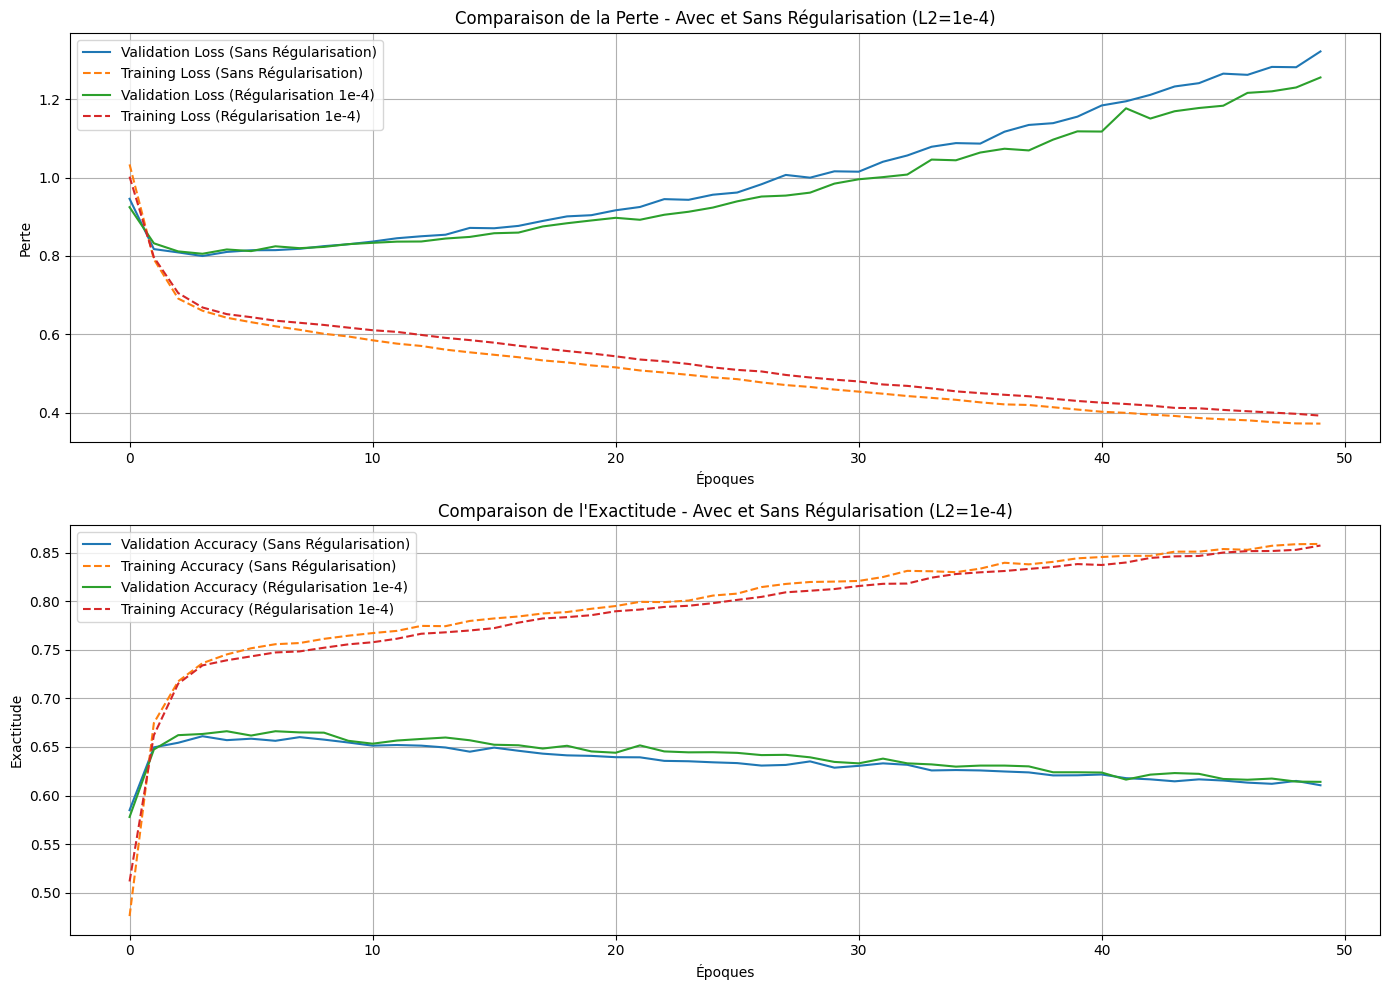

In [174]:
plot_regularization_comparison(history_no_reg, history_l2_0_01, '0.01')
plot_regularization_comparison(history_no_reg, history_l2_0_001, '0.001')
plot_regularization_comparison(history_no_reg, history_l2_1e_4, '1e-4')

Le surapprentissage est clairement réduit avec une régularisation, cependant, les performances du modèle sont clairement moins bonnes, ce qui pose la question de l'efficacité de la régularisation sur notre ensemble de données.

- Les couches de **dropout** sont une technique de régularisation dans les réseaux de neurones, où un sous-ensemble aléatoire de neurones est temporairement retiré pendant l'entraînement. Cela aide à éviter le surapprentissage en favorisant la redondance et en améliorant la capacité du réseau à généraliser sur de nouvelles données. Sélectionnez un modèle spécifique parmi les expériences ci-dessus, où vous avez plusieurs couches, et expérimentez l'ajout d'une ou de plusieurs couches de dropout dans votre réseau. Testez deux taux différents, par exemple 0.25 et 0.5. Documentez vos observations.

In [175]:
def create_and_train_model(dropout_rate=None):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))
    model.add(layers.Dense(8, activation='relu'))
    if dropout_rate is not None:
        model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(8, activation='relu'))
    if dropout_rate is not None:
        model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(8, activation='relu'))
    if dropout_rate is not None:
        model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(3, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_valid, Y_valid), verbose=0)
    return history

In [176]:
history_no_dropout = create_and_train_model(dropout_rate=None)
history_dropout_0_25 = create_and_train_model(dropout_rate=0.25)
history_dropout_0_5 = create_and_train_model(dropout_rate=0.5)

In [177]:
def plot_model_performance(histories, labels):
    plt.figure(figsize=(14, 10))
    plt.subplot(2, 1, 1)
    for history, label in zip(histories, labels):
        plt.plot(history.history['loss'], linestyle='--', label=f'Perte d\'entraînement ({label})')
        plt.plot(history.history['val_loss'], label=f'Perte de validation ({label})')
    plt.title('Comparaison de la Perte - Avec et Sans Dropout')
    plt.xlabel('Époques')
    plt.ylabel('Perte')
    plt.legend()
    plt.grid(True)
    plt.subplot(2, 1, 2)
    for history, label in zip(histories, labels):
        plt.plot(history.history['accuracy'], linestyle='--', label=f'Exactitude d\'entraînement ({label})')
        plt.plot(history.history['val_accuracy'], label=f'Exactitude de validation ({label})')
    plt.title('Comparaison de l\'Exactitude - Avec et Sans Dropout')
    plt.xlabel('Époques')
    plt.ylabel('Exactitude')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

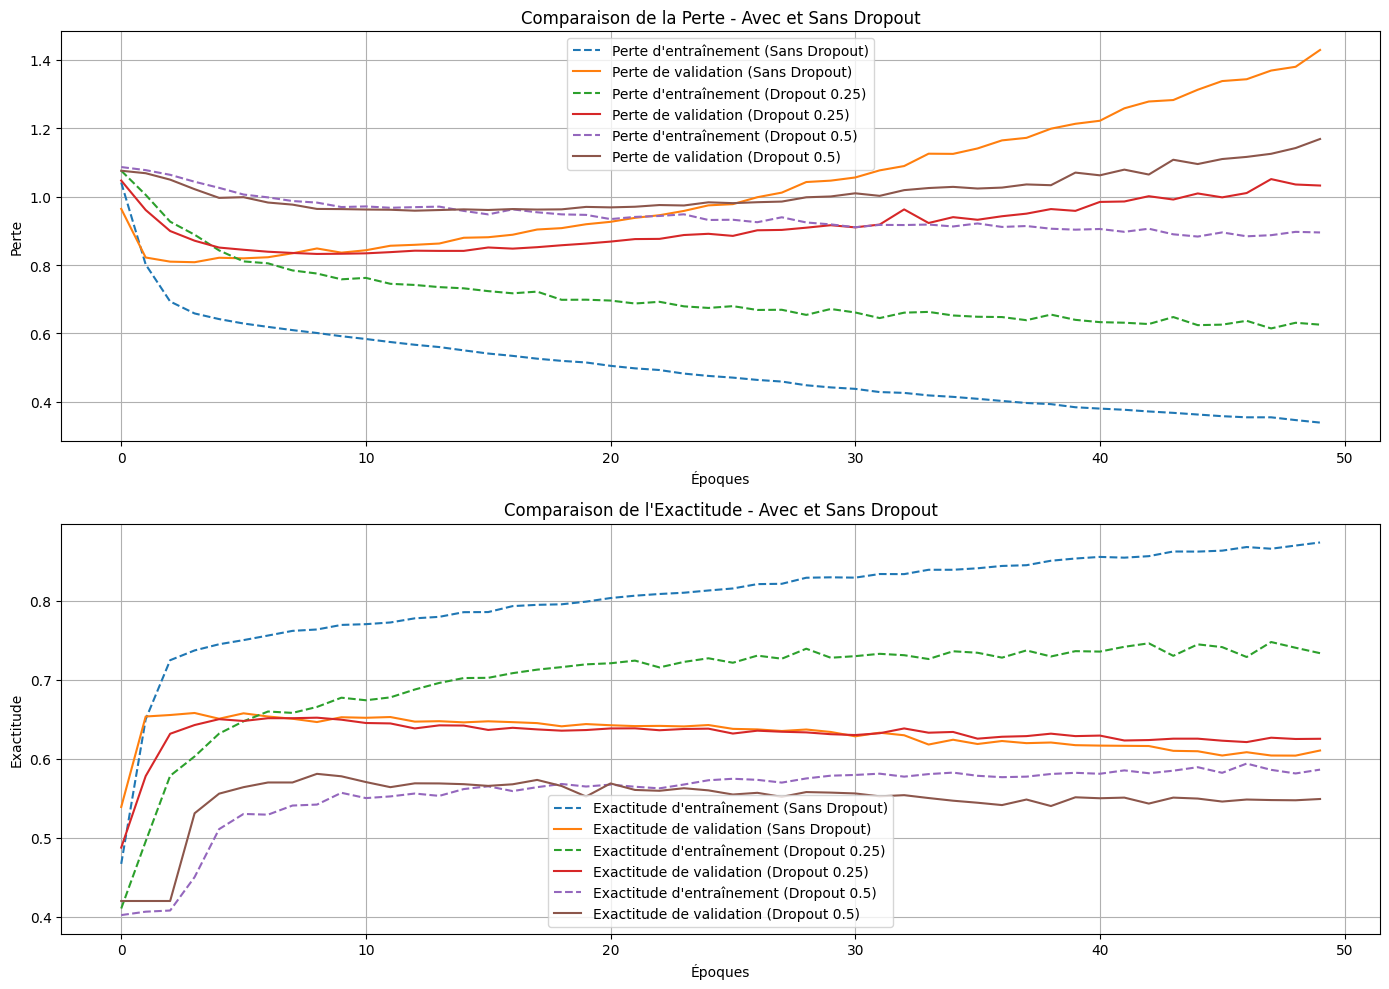

In [178]:
histories = [history_no_dropout, history_dropout_0_25, history_dropout_0_5]
labels = ['Sans Dropout', 'Dropout 0.25', 'Dropout 0.5']
plot_model_performance(histories, labels)

- Résumez vos expériences en utilisant une représentation graphique telle que la Figure 6.15 [sur cette page](https://egallic.fr/Enseignement/ML/ECB/book/deep-learning.html).

La régularisation et le dropout ont clairement un impact sur le surapprentissage. Cependant, les performances du modèle sont clairement moins bonnes. Indiquant que la régularisation et le dropout ne sont pas efficaces sur notre ensemble de données, ou du moins pas avec les paramètres que nous avons utilisés.
Plus de tests seraient nécessaires pour déterminer si la régularisation et le dropout sont efficaces pour notre cas d'utilisation, et si la manière dont nous les avons utilisés est la plus efficace.

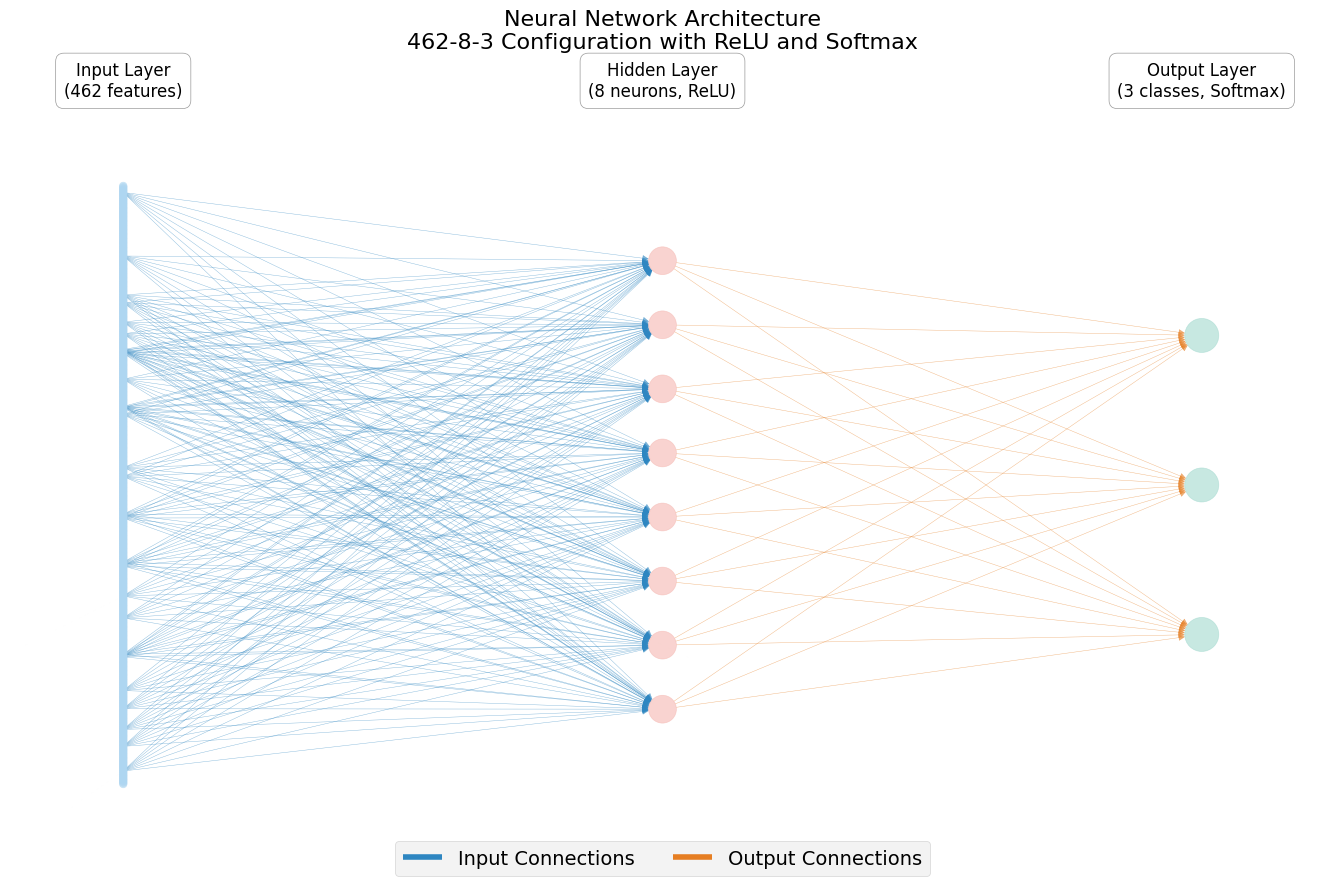

In [192]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_large_neural_network():
    plt.style.use('fivethirtyeight')
    G = nx.DiGraph()
    pos = {}
    num_input_nodes = 462
    num_hidden_nodes = 8
    num_output_nodes = 3

    input_positions = np.linspace(-1, 1, num_input_nodes)
    for i in range(num_input_nodes):
        G.add_node(f'X{i+1}', layer='Input')
        pos[f'X{i+1}'] = (0, input_positions[i])

    hidden_positions = np.linspace(-0.75, 0.75, num_hidden_nodes)
    for j in range(num_hidden_nodes):
        G.add_node(f'H{j+1}', layer='Hidden')
        pos[f'H{j+1}'] = (1, hidden_positions[j])

    output_positions = np.linspace(-0.5, 0.5, num_output_nodes)
    for k in range(num_output_nodes):
        G.add_node(f'O{k+1}', layer='Output')
        pos[f'O{k+1}'] = (2, output_positions[k])

    np.random.seed(42)
    edge_sample_rate = 0.05
    
    for i in range(num_input_nodes):
        if np.random.random() < edge_sample_rate:
            for j in range(num_hidden_nodes):
                G.add_edge(f'X{i+1}', f'H{j+1}', color='#2E86C1')

    for j in range(num_hidden_nodes):
        for k in range(num_output_nodes):
            G.add_edge(f'H{j+1}', f'O{k+1}', color='#E67E22')

    fig, ax = plt.subplots(figsize=(15, 10), dpi=100, facecolor='white')
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')
    
    edge_colors = [G[u][v]['color'] for u, v in G.edges()]

    nx.draw(G, pos,
            node_color=[
                '#AED6F1' if 'X' in node else
                '#F5B7B1' if 'H' in node else
                '#A2D9CE'
                for node in G.nodes()
            ],
            node_size=[
                30 if 'X' in node else
                400 if 'H' in node else
                600
                for node in G.nodes()
            ],
            edge_color=edge_colors,
            width=0.3,
            alpha=0.6,
            with_labels=False,
            ax=ax)

    label_style = {
        'bbox': dict(facecolor='white', 
                    edgecolor='gray',
                    boxstyle='round,pad=0.5',
                    alpha=0.8),
        'fontsize': 12,
        'horizontalalignment': 'center'
    }
    ax.text(0, 1.3, 'Input Layer\n(462 features)', **label_style)
    ax.text(1, 1.3, 'Hidden Layer\n(8 neurons, ReLU)', **label_style)
    ax.text(2, 1.3, 'Output Layer\n(3 classes, Softmax)', **label_style)
    plt.title("Neural Network Architecture\n462-8-3 Configuration with ReLU and Softmax", 
              fontsize=16, 
              pad=60)
    
    plt.axis('off')
    legend_elements = [
        plt.Line2D([0], [0], color='#2E86C1', label='Input Connections'),
        plt.Line2D([0], [0], color='#E67E22', label='Output Connections')
    ]
    ax.legend(handles=legend_elements, 
             loc='upper center',
             bbox_to_anchor=(0.5, 0), 
             ncol=2)
    plt.subplots_adjust(top=0.85, bottom=0.15)
    plt.show()

# Generate the visualization
draw_large_neural_network()

Cela est une reprensetation de comment un réseau de neuronnes fonctionne et comment les différentes couches et hyperparamètres affectent les performances du modèle.

- L'**arrêt anticipé** est une technique de régularisation lors de l'entraînement d'un réseau de neurones, où le processus est interrompu lorsque les performances sur l'ensemble de validation commencent à se dégrader, ce qui empêche le réseau d'apprendre le bruit dans les données d'entraînement. Parmi toutes les expériences menées jusqu'à présent, choisissez **une** configuration (le nombre de couches, le nombre de nœuds, la fonction d'activation, la pénalité L2 et les couches de dropout) qui a donné les meilleures performances. Utilisez un graphique de perte et de précision pour déterminer le nombre optimal d'itérations d'entraînement pour ce réseau. Quel est le nombre optimal d'époques pour cette configuration de réseau et pourquoi ?

In [193]:
def train_model_with_early_stopping():
    model = keras.Sequential([
        layers.Input(shape=(X_train.shape[1],)),
        layers.Dense(8, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        layers.Dropout(0.25),
        layers.Dense(3, activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(
        X_train, Y_train,
        epochs=1000,
        batch_size=32,
        validation_data=(X_valid, Y_valid),
        callbacks=[early_stopping],
        verbose=0
    )
    return history

In [194]:
history = train_model_with_early_stopping()

In [195]:
def plot_loss_accuracy(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    ax1.plot(history.history['loss'], label='Training Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_title('Training and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)
    ax2.plot(history.history['accuracy'], label='Training Accuracy')
    ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_title('Training and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

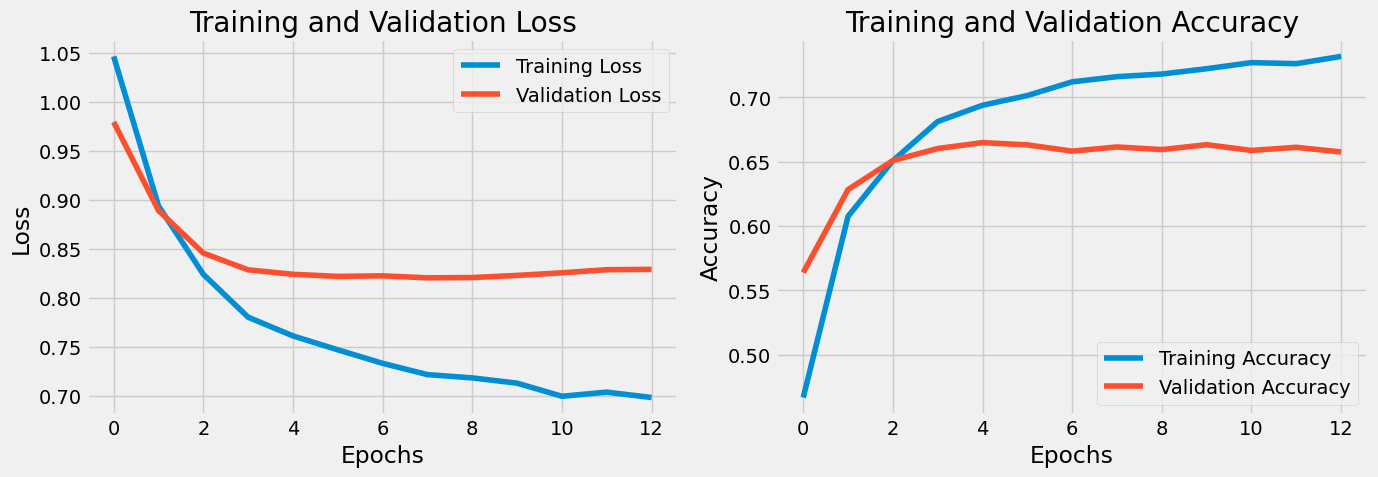

In [196]:
plot_loss_accuracy(history)

Le nombre optimal d'époques pour cette configuration de réseau est 12. En effet, la fonction d'arrêt anticipé a arrêté l'entraînement du modèle après 12 époques car la perte sur l'ensemble de validation a commencé à augmenter. Cela indique que le modèle a commencé à surapprendre les données.

## Test

### 9. **Comparaison des modèles** :

- Évaluez le modèle de référence sur l'ensemble de test, en utilisant l'ensemble de paramètres optimal identifié lors de la recherche de grille. Appliquez également la meilleure configuration de réseau de neurones à l'ensemble de test.

- Quantifiez les performances du modèle de référence (meilleure configuration d'hyperparamètres) et de votre réseau de neurones (meilleure configuration) en utilisant des métriques telles que la précision, le rappel et le score F1. Comment ces deux modèles se comparent-ils au modèle de base ?

- Fournissez des recommandations sur le(s) modèle(s) à choisir pour cette tâche et justifiez vos choix en fonction des résultats de l'analyse.

In [201]:
logistic_model = LogisticRegression(max_iter=1000, penalty=None, tol=0.01)
logistic_model.fit(X_train, Y_train)
y_pred_logistic = cross_val_predict(logistic_model, X_test, Y_test, cv=8)
logistic_accuracy = accuracy_score(Y_test, y_pred_logistic)
logistic_precision = precision_score(Y_test, y_pred_logistic, average='weighted')
logistic_recall = recall_score(Y_test, y_pred_logistic, average='weighted')
logistic_f1 = f1_score(Y_test, y_pred_logistic, average='weighted')
print("Logistic Regression Model Performance on Test Set:")
print(f"Accuracy: {logistic_accuracy:.4f}")
print(f"Precision: {logistic_precision:.4f}")
print(f"Recall: {logistic_recall:.4f}")
print(f"F1 Score: {logistic_f1:.4f}")

nn_model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(8, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.25),
    layers.Dense(3, activation='softmax')
])
nn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_valid, Y_valid), verbose=0)
nn_clf = KerasClassifier(model=nn_model, epochs=10, batch_size=32, verbose=0)
y_pred_nn = cross_val_predict(nn_clf, X_test, Y_test, cv=8)
nn_accuracy = accuracy_score(Y_test, y_pred_nn)
nn_precision = precision_score(Y_test, y_pred_nn, average='weighted')
nn_recall = recall_score(Y_test, y_pred_nn, average='weighted')
nn_f1 = f1_score(Y_test, y_pred_nn, average='weighted')
print("\nNeural Network Model Performance on Test Set:")
print(f"Accuracy: {nn_accuracy:.4f}")
print(f"Precision: {nn_precision:.4f}")
print(f"Recall: {nn_recall:.4f}")
print(f"F1 Score: {nn_f1:.4f}")

Logistic Regression Model Performance on Test Set:
Accuracy: 0.6813
Precision: 0.6794
Recall: 0.6813
F1 Score: 0.6777

Neural Network Model Performance on Test Set:
Accuracy: 0.6853
Precision: 0.6860
Recall: 0.6853
F1 Score: 0.6797


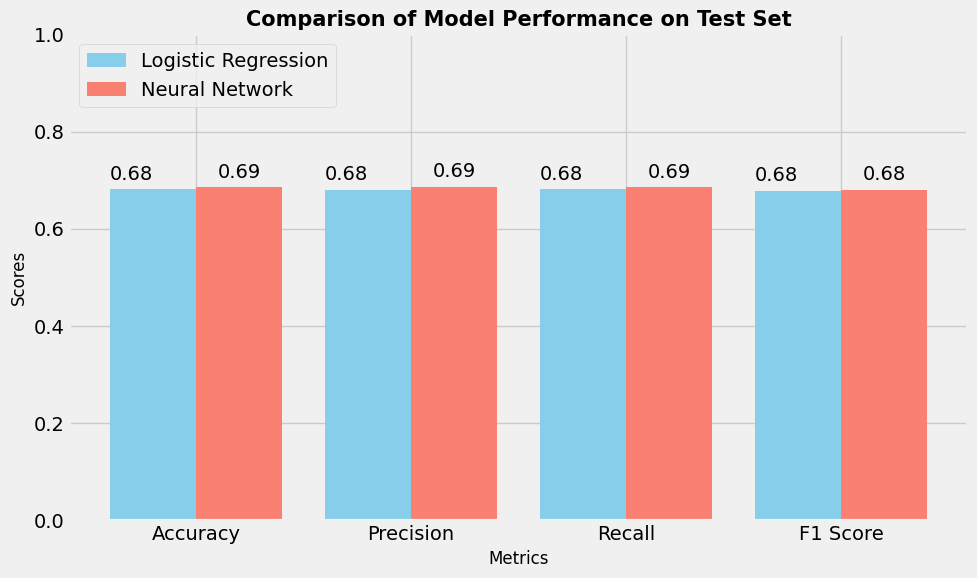

In [202]:
logistic_metrics = {
    "Accuracy": logistic_accuracy,
    "Precision": logistic_precision,
    "Recall": logistic_recall,
    "F1 Score": logistic_f1
}
nn_metrics = {
    "Accuracy": nn_accuracy,
    "Precision": nn_precision,
    "Recall": nn_recall,
    "F1 Score": nn_f1
}

labels = list(logistic_metrics.keys())
logistic_values = list(logistic_metrics.values())
nn_values = list(nn_metrics.values())
x = range(len(labels))
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, logistic_values, width=0.4, label='Logistic Regression', color='skyblue', align='center')
ax.bar([i + 0.4 for i in x], nn_values, width=0.4, label='Neural Network', color='salmon', align='center')

ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Comparison of Model Performance on Test Set', fontsize=15, fontweight='bold')
ax.set_xticks([i + 0.2 for i in x])
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)
ax.legend(loc='upper left')
for i, v in enumerate(logistic_values):
    ax.text(i - 0.1, v + 0.02, f"{v:.2f}", color='black', ha='center')
for i, v in enumerate(nn_values):
    ax.text(i + 0.4, v + 0.02, f"{v:.2f}", color='black', ha='center')

plt.tight_layout()
plt.show()

Nos deux modèles, le modèle de regression logistique et le modèle de réseau de neuronnes, ont des performances similaires. Cependant, le modèle de réseau de neuronnes est légèrement plus performant que le modèle de regression logistique. Cela est dû au fait que le modèle de réseau de neuronnes est plus complexe et peut apprendre des relations plus complexes entre les données. 
En général, le modèle conseillé serait le modèle de réseau de neuronnes car il est plus performant que le modèle de regression logistique, mais si le temps d'entraînement est un facteur important, le modèle de regression logistique est une bonne alternative. La différence de performances entre les deux modèles n'est pas significative, donc le choix entre les deux dépendra des contraintes de temps.

# Resources
## General Machine Learning and Neural Networks
- [Wikipedia: Neural Network (Machine Learning)](https://en.wikipedia.org/wiki/Neural_network_(machine_learning))
- [Data Science Stack Exchange: Defining Input Shape for Keras Dense Layer](https://datascience.stackexchange.com/questions/106726/keras-how-to-define-input-shape-for-1st-dense-layer)
- [Égallic: Deep Learning Two-Layer Neural Network Diagram](https://egallic.fr/Enseignement/ML/ECB/book/deep-learning.html#fig:fig-neural-net-two-layer)

## Graph Neural Networks
- [Cnvrg.io: Graph Neural Networks](https://cnvrg.io/graph-neural-networks/)
- [NetworkX Documentation: Tutorial](https://networkx.org/documentation/stable/tutorial.html)

## Error Handling and Warnings in Machine Learning
- [Stack Overflow: ConvergenceWarning with liblinear Solver in Scikit-learn](https://stackoverflow.com/questions/52670012/convergencewarning-liblinear-failed-to-converge-increase-the-number-of-iterati)
- [Stack Overflow: UndefinedMetricWarning – F-score Set to 0.0](https://stackoverflow.com/questions/43162506/undefinedmetricwarning-f-score-is-ill-defined-and-being-set-to-0-0-in-labels-wi)
- [AdrianGB: SciKeras Migration Guide](https://adriangb.com/scikeras/stable/migration.html)

## Data Manipulation and Formatting
- [Stack Overflow: Pandas Styler - hide_index AttributeError](https://stackoverflow.com/questions/55051920/pandas-styler-object-has-no-attribute-hide-index-error)

## Additional Reference (Biology)
- [Wikipedia: Amino Acid](https://fr.wikipedia.org/wiki/Acide_amin%C3%A9)